## <u>**Use the "Text" blocks to provide explanations wherever you find them necessary. Highlight your answers inside these text fields to ensure that we don't miss it while grading your HW.**</u> 

## **Setup**

- Code to download the data directly from the colab notebook.
- If you find it easier to download the data from the kaggle website (and uploading it to your drive), you can skip this section.

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# First mount your drive before running these cells. 
# Create a folder for the this HW and change to that dir
%cd /content/drive/MyDrive/DSF/HW3

/content/drive/MyDrive/DSF/HW3


In [ ]:
!pip install -q kaggle

In [ ]:
from google.colab import files
# Create a new API token under "Account" in the kaggle webpage and download the json file
# Upload the file by clicking on the browse 
files.upload()

In [ ]:
%cp kaggle.json /root/.kaggle/

In [ ]:
!kaggle competitions download -c  rossmann-store-sales

  0% 0.00/192k [00:00<?, ?B/s]
100% 192k/192k [00:00<00:00, 12.6MB/s]
  0% 0.00/310k [00:00<?, ?B/s]
100% 310k/310k [00:00<00:00, 19.6MB/s]
 45% 3.00M/6.71M [00:00<00:00, 28.9MB/s]
100% 6.71M/6.71M [00:00<00:00, 42.8MB/s]
  0% 0.00/44.0k [00:00<?, ?B/s]
100% 44.0k/44.0k [00:00<00:00, 5.70MB/s]


In [ ]:
%ls

sample_submission.csv  store.csv  test.csv  train.csv


## **Section 1: Library and Data Imports (Q1)**

- Import your libraries and read the data into a dataframe. Print the head of the dataframe. 

In [2]:
#fill in dtypes dict for efficient memory utilization
import pandas as pd 
import numpy as np

train_dtypes = {
    'Store' : 'uint16',
    'DayOfWeek':'category',
    'Customers': 'uint16',
    'Sales': 'uint32',
    'Open' : 'uint8',
    'Promo': 'uint8',
    'SchoolHoliday': 'uint8',
    'StateHoliday': 'category'
}

store_dtypes = {
    'Store' : 'uint16',
    'StoreType':'category',
    'Assortment':'category',
    'CompetitionDistance': 'float32',
    'CompetitionOpenSinceMonth': 'float16',
    'CompetitionOpenSinceYear': 'float16', 
    'Promo2': 'uint8',
    'Promo2SinceWeek': 'float16',
    'Promo2SinceYear': 'float16',
    'PromoInterval': 'category',

}
parse_dates = ['Date']

train_df = pd.read_csv('/content/drive/MyDrive/DSF/HW3/train.csv', dtype=train_dtypes, parse_dates=parse_dates)

store_df = pd.read_csv('/content/drive/MyDrive/DSF/HW3/store.csv', dtype=store_dtypes)

store_df.head()


,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [165]:
store_df.info()
store_df[store_df.Store == 453]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   Store                      1115 non-null   uint16  
 1   StoreType                  1115 non-null   category
 2   Assortment                 1115 non-null   category
 3   CompetitionDistance        1112 non-null   float32 
 4   CompetitionOpenSinceMonth  761 non-null    float16 
 5   CompetitionOpenSinceYear   761 non-null    category
 6   Promo2                     1115 non-null   uint8   
 7   Promo2SinceWeek            571 non-null    category
 8   Promo2SinceYear            571 non-null    category
 9   PromoInterval              571 non-null    category
dtypes: category(6), float16(1), float32(1), uint16(1), uint8(1)
memory usage: 18.8 KB


,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
452,453,a,c,75860.0,NaN,NaN,0,NaN,NaN,NaN


In [ ]:
store_df.Store.unique()

array([   1,    2,    3, ..., 1113, 1114, 1115], dtype=uint16)

In [ ]:
store_df.StoreType.unique() # category

array(['c', 'a', 'd', 'b'], dtype=object)

In [ ]:
store_df.Assortment.unique() # category

array(['a', 'c', 'b'], dtype=object)

In [ ]:
store_df.CompetitionDistance.unique() # float/int

In [ ]:
store_df.CompetitionOpenSinceMonth.unique() # int/category

array(['9', '11', '12', '4', '10', '8', nan, '3', '6', '5', '1', '2', '7'],
      dtype=object)

In [ ]:
store_df.CompetitionOpenSinceYear.unique()

array(['2008', '2007', '2006', '2009', '2015', '2013', '2014', '2000',
       '2011', nan, '2010', '2005', '1999', '2003', '2012', '2004',
       '2002', '1961', '1995', '2001', '1990', '1994', '1900', '1998'],
      dtype=object)

In [ ]:
store_df.Promo2.unique() #int/float/boolean

array(['0', '1'], dtype=object)

In [ ]:
store_df.Promo2SinceWeek.unique() #int/float

array([nan, '13', '14', '1', '45', '40', '26', '22', '5', '6', '10', '31',
       '37', '9', '39', '27', '18', '35', '23', '48', '36', '50', '44',
       '49', '28'], dtype=object)

In [ ]:
store_df.PromoInterval.unique()

[NaN, 'Jan,Apr,Jul,Oct', 'Feb,May,Aug,Nov', 'Mar,Jun,Sept,Dec']
Categories (3, object): ['Jan,Apr,Jul,Oct', 'Feb,May,Aug,Nov', 'Mar,Jun,Sept,Dec']

In [ ]:
store_df.Promo2SinceYear.unique()

[NaN, '2010', '2011', '2012', '2009', '2014', '2015', '2013']
Categories (7, object): ['2010', '2011', '2012', '2009', '2014', '2015', '2013']

In [ ]:
train_df.head()

train_df[train_df.StateHoliday == '0']

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1
...,...,...,...,...,...,...,...,...,...
1016090,1111,3,2013-01-02,5097,505,1,0,0,1
1016091,1112,3,2013-01-02,10797,892,1,0,0,1
1016092,1113,3,2013-01-02,6218,753,1,0,0,1
1016093,1114,3,2013-01-02,20642,3401,1,0,0,1


In [ ]:
train_df[train_df.StateHoliday == 'c']

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
241055,1,5,2014-12-26,0,0,0,0,c,1
241056,2,5,2014-12-26,0,0,0,0,c,1
241057,3,5,2014-12-26,0,0,0,0,c,1
241058,4,5,2014-12-26,0,0,0,0,c,1
241059,5,5,2014-12-26,0,0,0,0,c,1
...,...,...,...,...,...,...,...,...,...
618035,1111,3,2013-12-25,0,0,0,0,c,1
618036,1112,3,2013-12-25,0,0,0,0,c,1
618037,1113,3,2013-12-25,0,0,0,0,c,1
618038,1114,3,2013-12-25,0,0,0,0,c,1


In [ ]:
train_df.DayOfWeek.unique() #DayOfWeek

array(['5', '4', '3', '2', '1', '7', '6'], dtype=object)

In [ ]:
train_df.Date.unique() #date

In [ ]:
train_df.Sales.unique()



['5263', '6064', '8314', '13995', '4822', ..., '20050', '1067', '660', '17815', '23303']
Length: 21734
Categories (21734, object): ['5263', '6064', '8314', '13995', ..., '1067', '660', '17815', '23303']

In [ ]:
train_df.Customers.unique()

array(['555', '625', '821', ..., '3900', '36', '4065'], dtype=object)

In [ ]:
train_df.Customers.describe()

count     1017209
unique       4086
top             0
freq       172869
Name: Customers, dtype: object

In [ ]:
train_df.Open.unique()

array(['1', '0'], dtype=object)

In [ ]:
train_df.Promo.unique()

array(['1', '0'], dtype=object)

In [ ]:
train_df.StateHoliday.unique()

array(['0', 'a', 'b', 'c'], dtype=object)

In [7]:
train_df.SchoolHoliday.unique()

array([1, 0], dtype=uint8)

In [3]:
train_ = train_df.set_index('Store')
stores_ = store_df.set_index('Store')
merged_train_df = train_.merge(stores_, how='inner', left_index=True, right_index=True).reset_index()

In [26]:
merged_train_df.CompetitionDistance.nlargest(5)

412536    75860.0
412537    75860.0
412538    75860.0
412539    75860.0
412540    75860.0
Name: CompetitionDistance, dtype: float32

In [168]:
merged_train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype         
---  ------                     --------------    -----         
 0   Store                      1017209 non-null  uint16        
 1   DayOfWeek                  1017209 non-null  category      
 2   Date                       1017209 non-null  datetime64[ns]
 3   Sales                      1017209 non-null  uint32        
 4   Customers                  1017209 non-null  uint16        
 5   Open                       1017209 non-null  uint8         
 6   Promo                      1017209 non-null  uint8         
 7   StateHoliday               1017209 non-null  category      
 8   SchoolHoliday              1017209 non-null  uint8         
 9   StoreType                  1115 non-null     category      
 10  Assortment                 1115 non-null     category      
 11  CompetitionDistance        1112 non-null  

In [4]:
merged_train_df['Year'] = merged_train_df.Date.dt.year
merged_train_df['Month'] = merged_train_df.Date.dt.month
merged_train_df['Day'] = merged_train_df.Date.dt.day
merged_train_df['WeekOfYear'] = merged_train_df.Date.dt.isocalendar().week
merged_train_df['AvgItemsBought'] = merged_train_df.Sales/merged_train_df.Customers
merged_train_df['IsHoliday'] =  np.where((merged_train_df.StateHoliday == '0') & (merged_train_df.SchoolHoliday == 0) , 'NotAHoliday', 'Holiday')

In [ ]:
merged_train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1017209 entries, 0 to 1017208
Data columns (total 25 columns):
 #   Column                     Non-Null Count    Dtype         
---  ------                     --------------    -----         
 0   Store                      1017209 non-null  uint16        
 1   DayOfWeek                  1017209 non-null  category      
 2   Date                       1017209 non-null  datetime64[ns]
 3   Sales                      1017209 non-null  uint32        
 4   Customers                  1017209 non-null  uint16        
 5   Open                       1017209 non-null  uint8         
 6   Promo                      1017209 non-null  uint8         
 7   StateHoliday               1017209 non-null  category      
 8   SchoolHoliday              1017209 non-null  uint8         
 9   StoreType                  1115 non-null     category      
 10  Assortment                 1115 non-null     category      
 11  CompetitionDistance        1112 non-null  

In [ ]:
merged_train_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month,Day,WeekOfYear,AvgItemsBought,IsHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015,7,31,31,9.482883,Holiday
1,2,5,2015-07-31,6064,625,1,1,0,1,c,a,1270.0,9.0,2008,0.0,NaN,NaN,NaN,2015,7,31,31,9.702400,Holiday
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,570.0,11.0,2007,1.0,13,2010,"Jan,Apr,Jul,Oct",2015,7,31,31,10.126675,Holiday
3,4,5,2015-07-31,13995,1498,1,1,0,1,a,a,14128.0,12.0,2006,1.0,14,2011,"Jan,Apr,Jul,Oct",2015,7,31,31,9.342457,Holiday
4,5,5,2015-07-31,4822,559,1,1,0,1,c,c,620.0,9.0,2009,0.0,NaN,NaN,NaN,2015,7,31,31,8.626118,Holiday


In [206]:
merged_train_df[merged_train_df.Store ==516].Sales.sum() // 134

34177

## **Section 2: Effect of Holidays (Q2)**

In [ ]:
merged_train_df['Date'].describe()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """Entry point for launching an IPython kernel.


count                    1115
unique                      2
top       2015-07-31 00:00:00
freq                     1114
first     2015-07-30 00:00:00
last      2015-07-31 00:00:00
Name: Date, dtype: object

In [257]:
merged_train_df[["Sales", "StateHoliday"]].groupby('StateHoliday').sum().reset_index()

,StateHoliday,Sales
0,0,5.865165e+09
1,a,5.890305e+06
2,b,1.433744e+06
3,c,6.918060e+05


In [258]:
merged_train_df['isStateHoliday'] = np.where(merged_train_df.StateHoliday == '0', 0, 1 )

In [261]:
merged_train_df.groupby('isStateHoliday')['Sales'].sum().reset_index()

,isStateHoliday,Sales
0,0,5.865165e+09
1,1,8.015855e+06


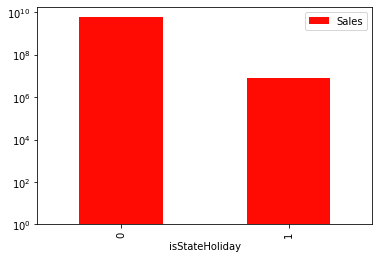

In [284]:
merged_train_df.groupby('isStateHoliday')['Sales'].sum().reset_index().plot(kind ='bar', x='isStateHoliday', y ='Sales', log=True)

Given the above graph is on log scale, the people prefer to stay indoors on stateholiday and shop less than on non holidays. 

In [280]:
temp = merged_train_df[["Sales", "StateHoliday"]]
state_holiday_only = temp[temp.StateHoliday != '0']
state_holiday_only.StateHoliday.value_counts()

a    20260
b     6690
c     4100
0        0
Name: StateHoliday, dtype: int64

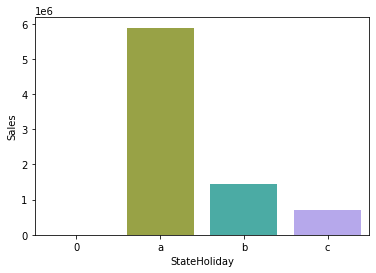

In [282]:
#state_holiday_only[["Sales", "StateHoliday"]].groupby('StateHoliday')['Sales'].sum().reset_index().plot(kind ='bar', x='StateHoliday', y ='Sales')

sns.barplot(x ='StateHoliday', y='Sales', ci=None,
             data=state_holiday_only[["Sales", "StateHoliday"]].groupby('StateHoliday')['Sales'].sum().reset_index())

Public holidays people tend to shop more than the combined shopping done on easter and christmas.

In [ ]:
merged_train_df.Year.value_counts()

2013    406974
2014    373855
2015    236380
Name: Year, dtype: int64

In [ ]:
merged_train_df.isStateHoliday.value_counts()

0    986159
1     31050
Name: isStateHoliday, dtype: int64

## **Section 3: Most and Least selling stores (Q3a & Q3b)**

In [5]:
sales_per_store = merged_train_df[['Store', 'Year', 'Sales']].groupby(['Store', 'Year'])['Sales'].sum().reset_index(name="agg_sales")

In [6]:
sales_per_store

,Store,Year,agg_sales
0,1,2013,1491140
1,1,2014,1433408
2,1,2015,792306
3,2,2013,1488164
4,2,2014,1516432
...,...,...,...
3340,1114,2014,6227969
3341,1114,2015,3809075
3342,1115,2013,1694723
3343,1115,2014,1985458


In [7]:
largest_cumulative_sales=sales_per_store.nlargest(5, 'agg_sales')

print(largest_cumulative_sales)

      Store  Year  agg_sales
783     262  2013    7564632
784     262  2014    7539709
2448    817  2013    7033036
1684    562  2014    6576882
1683    562  2013    6537251


In [8]:
smallest_cumulative_sales = sales_per_store.nsmallest(5, 'agg_sales')['Store']

print(smallest_cumulative_sales)

920     307
2522    841
1628    543
593     198
623     208
Name: Store, dtype: uint64


In [12]:
avg_weekly_sales = merged_train_df[['Store', 'Year', 'WeekOfYear', 'Sales']].groupby(['Store', 'Year', 'WeekOfYear'])['Sales'].sum().reset_index(name="avg_sales_per_week")

In [13]:
def get_smallest_cumulative_sales_for_year(df ,year, items):
  return sales_per_store[sales_per_store.Year == year].nsmallest(items, 'agg_sales')['Store']

In [14]:
avg_weekly_sales_for_smallest_cdf_stores = None

years = [2013, 2014, 2015]


for year in years:
  for store_num in get_smallest_cumulative_sales_for_year(sales_per_store, year, 5):
    if avg_weekly_sales_for_smallest_cdf_stores is not None:
      avg_weekly_sales_for_smallest_cdf_stores = avg_weekly_sales_for_smallest_cdf_stores.append(avg_weekly_sales[avg_weekly_sales.Store == store_num], ignore_index=True)
    else:
      avg_weekly_sales_for_smallest_cdf_stores = avg_weekly_sales[avg_weekly_sales.Store == store_num]

avg_weekly_sales_for_smallest_cdf_stores
  

,Store,Year,WeekOfYear,avg_sales_per_week
0,103,2013,1,9537
1,103,2013,2,0
2,103,2013,3,0
3,103,2013,4,0
4,103,2013,5,0
...,...,...,...,...
1895,208,2015,27,21381
1896,208,2015,28,17267
1897,208,2015,29,21245
1898,208,2015,30,15626


In [15]:
def get_largest_cumulative_sales_for_year(df ,year, items):
  return sales_per_store[sales_per_store.Year == year].nlargest(items, 'agg_sales')['Store']


In [16]:
largest_cumulative_sales = get_largest_cumulative_sales_for_year(sales_per_store, 2013, 5)
print(largest_cumulative_sales)

783      262
2448     817
1683     562
3339    1114
1536     513
Name: Store, dtype: uint64


In [17]:
avg_weekly_sales_for_highest_cdf_stores = None

years = [2013, 2014, 2015]

for year in years:
  for store_num in get_largest_cumulative_sales_for_year(sales_per_store, year, 4):
    if avg_weekly_sales_for_highest_cdf_stores is not None:
      avg_weekly_sales_for_highest_cdf_stores = avg_weekly_sales_for_highest_cdf_stores.append(avg_weekly_sales[avg_weekly_sales.Store == store_num], ignore_index=True)
    else:
      avg_weekly_sales_for_highest_cdf_stores = avg_weekly_sales[avg_weekly_sales.Store == store_num]

avg_weekly_sales_for_highest_cdf_stores

,Store,Year,WeekOfYear,avg_sales_per_week
0,262,2013,1,150847
1,262,2013,2,134511
2,262,2013,3,120865
3,262,2013,4,138278
4,262,2013,5,135112
...,...,...,...,...
1995,842,2015,27,123352
1996,842,2015,28,119934
1997,842,2015,29,134059
1998,842,2015,30,115153


In [18]:
avg_weekly_sales_for_highest_cdf_stores['WeekOfYear'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52])

In [256]:
avg_weekly_sales_for_highest_cdf_stores[avg_weekly_sales_for_highest_cdf_stores.Year == 2013]

,Store,Year,WeekOfYear,avg_sales_per_week,sd_avg_sales_per_week
0,262,2013,1,150847,1.247650
1,262,2013,2,134511,0.461889
2,262,2013,3,120865,-0.194484
3,262,2013,4,138278,0.643081
4,262,2013,5,135112,0.490797
...,...,...,...,...,...
1937,842,2013,48,105803,-0.918966
1938,842,2013,49,133906,0.432788
1939,842,2013,50,120605,-0.206990
1940,842,2013,51,183327,2.809937


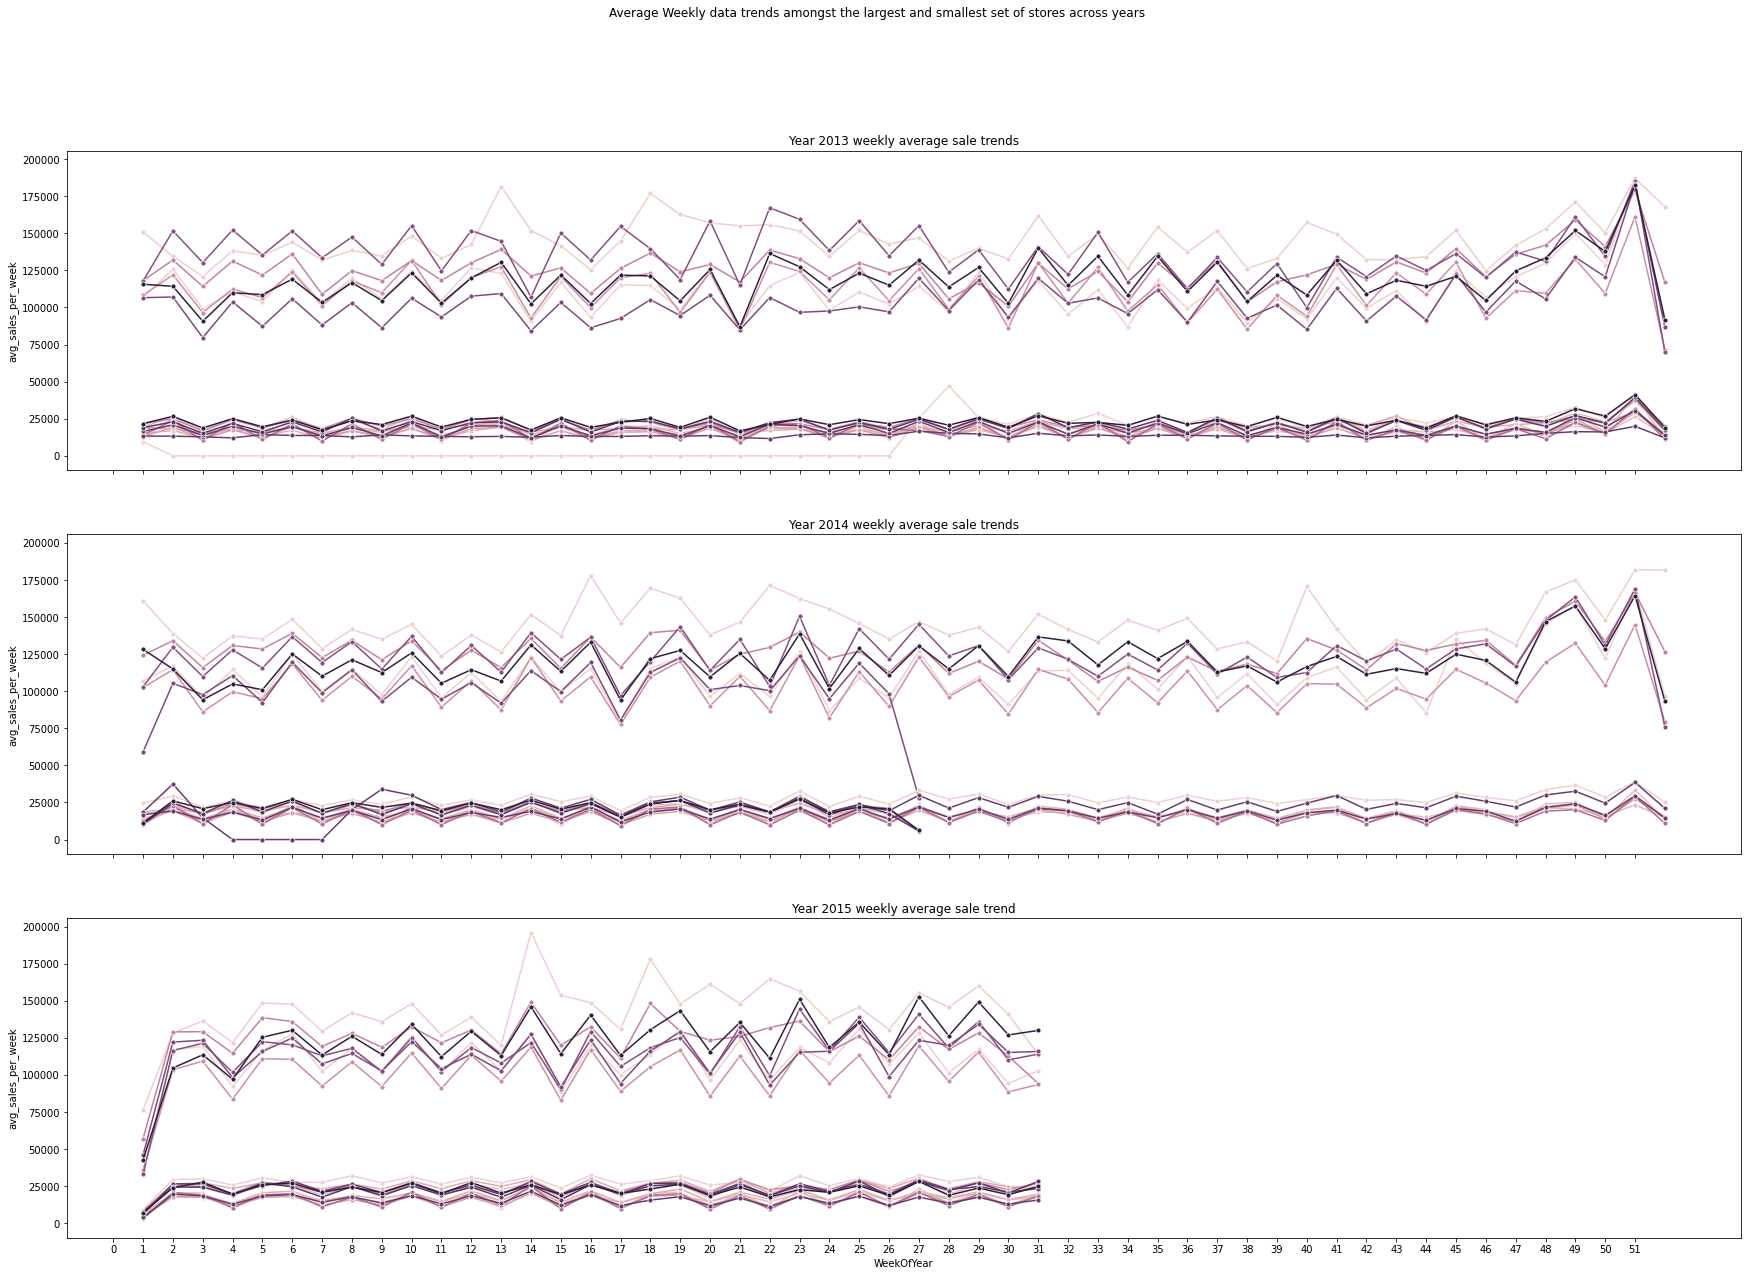

In [254]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axes = plt.subplots(3, 1,sharex=True, sharey=True, figsize=(30,20))
fig.suptitle('Average Weekly data trends amongst the largest and smallest set of stores across years')
colors = ["#FF0B04", "#4374B3"]# Set your custom color palette

sns.set_palette(sns.color_palette(colors))

sns.lineplot(ax=axes[0], x ='WeekOfYear', y= 'avg_sales_per_week', hue='Store', ci=None, legend=False, color='blue', 
             data=avg_weekly_sales_for_highest_cdf_stores[avg_weekly_sales_for_highest_cdf_stores.Year == 2013], marker='.', markersize=10)
sns.lineplot(ax=axes[0], x ='WeekOfYear', y ='avg_sales_per_week', hue='Store', ci=None, legend=False,
             data=avg_weekly_sales_for_smallest_cdf_stores[avg_weekly_sales_for_smallest_cdf_stores.Year == 2013], color='red', marker='.', markersize=10)
axes[0].set_title('Year 2013 weekly average sale trends')

sns.lineplot(ax=axes[1], x ='WeekOfYear', y= 'avg_sales_per_week', hue='Store', ci=None, legend=False,  color='blue',
             data=avg_weekly_sales_for_highest_cdf_stores[avg_weekly_sales_for_highest_cdf_stores.Year == 2014], marker='.', markersize=10)
sns.lineplot(ax=axes[1], x ='WeekOfYear', y ='avg_sales_per_week', hue='Store', ci=None, legend=False,
             data=avg_weekly_sales_for_smallest_cdf_stores[avg_weekly_sales_for_smallest_cdf_stores.Year == 2014], color='red', marker='.', markersize=10)
axes[1].set_title('Year 2014 weekly average sale trends')

sns.lineplot(ax=axes[2], x ='WeekOfYear', y= 'avg_sales_per_week', hue='Store', ci=None, legend=False, color='blue',
             data=avg_weekly_sales_for_highest_cdf_stores[avg_weekly_sales_for_highest_cdf_stores.Year == 2015], marker='.', markersize=10)
sns.lineplot(ax=axes[2], x ='WeekOfYear', y ='avg_sales_per_week', hue='Store', ci=None, legend=False, 
             data=avg_weekly_sales_for_smallest_cdf_stores[avg_weekly_sales_for_smallest_cdf_stores.Year == 2015], color='red', marker='.', markersize=10)
axes[2].set_title('Year 2015 weekly average sale trend')


# plt.legend(title='StoreType', loc='upper left', labels=['Highest Cumulative Sales', 'Lowest Cumulative Sales'])

plt.xticks([i for i in range(52)])
# plt.xlabel("Avg Sales per week in 2013")
plt.show()

AS seen by the patterns formed, the topmostr patterns are formed by the highest sales stores and the below graphs are formed by the low sales stores on cumulative basis

In [20]:
from sklearn.preprocessing import StandardScaler

standard_scaler = StandardScaler()
cols = ['avg_sales_per_week']

scaler = standard_scaler.fit(avg_weekly_sales_for_highest_cdf_stores[cols].values)
avg_weekly_sales_for_highest_cdf_stores['sd_avg_sales_per_week'] = scaler.transform(avg_weekly_sales_for_highest_cdf_stores[cols].values)

In [21]:
from sklearn.preprocessing import StandardScaler

standard_scaler = StandardScaler()
cols = ['avg_sales_per_week']

scaler = standard_scaler.fit(avg_weekly_sales_for_smallest_cdf_stores[cols].values)
avg_weekly_sales_for_smallest_cdf_stores['sd_avg_sales_per_week'] = scaler.transform(avg_weekly_sales_for_smallest_cdf_stores[cols].values)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:29: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.


<Figure size 1080x576 with 0 Axes>

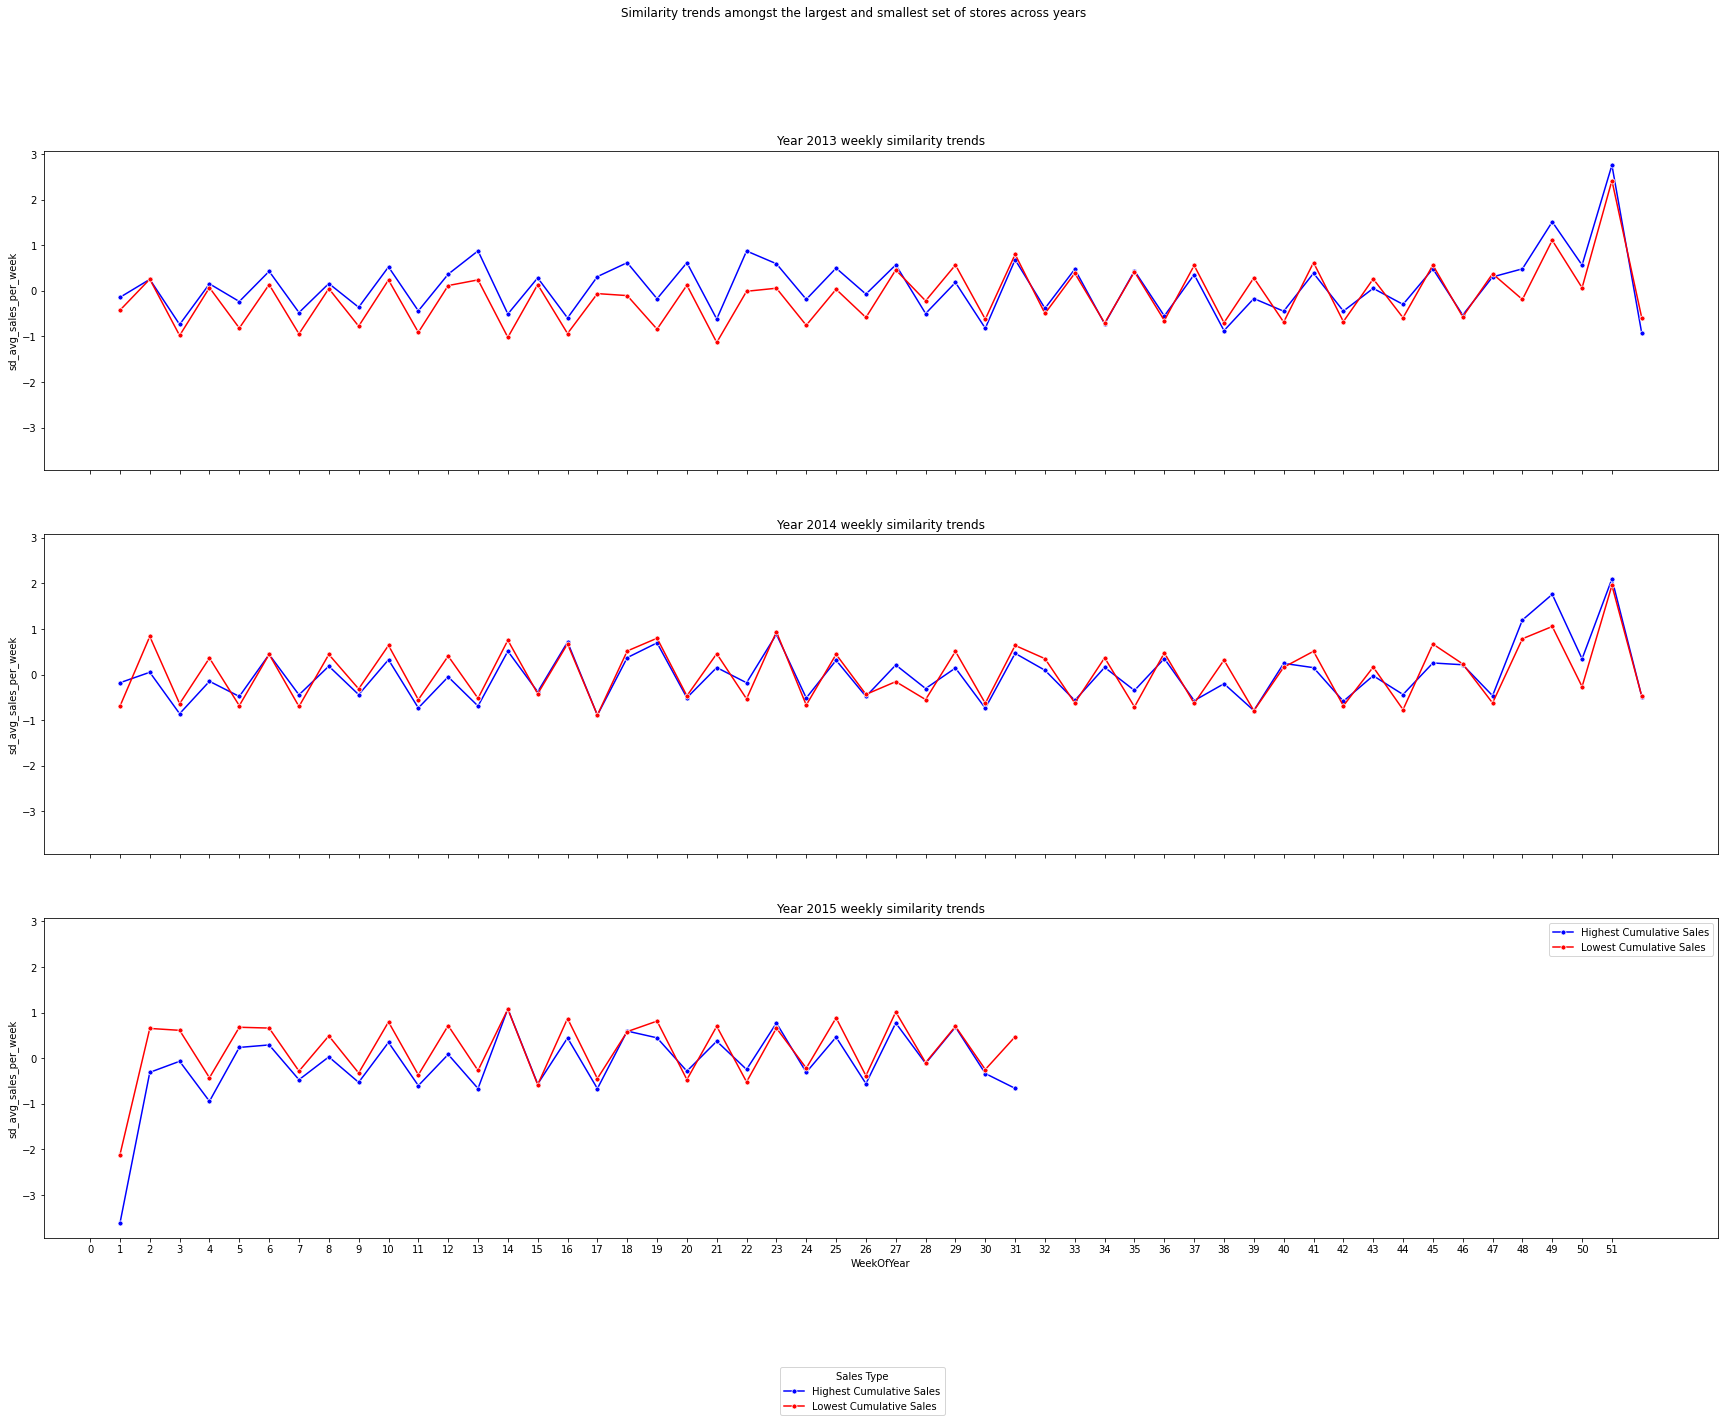

In [243]:
plt.figure(figsize=(15,8))

fig, axes = plt.subplots(3, 1,sharex=True, sharey=True, figsize=(30,20))
fig.suptitle('Similarity trends amongst the largest and smallest set of stores across years')
# fig.legend(title='StoreType', loc='upper left', labels=['Highest Cumulative Sales', 'Lowest Cumulative Sales']

g=sns.lineplot(ax=axes[0], x ='WeekOfYear', y='sd_avg_sales_per_week', hue='Year', ci=None, legend=False, palette=['blue'],
             data=avg_weekly_sales_for_highest_cdf_stores[avg_weekly_sales_for_highest_cdf_stores.Year == 2013], marker='.', markersize=10)
sns.lineplot(ax=axes[0], x ='WeekOfYear', y ='sd_avg_sales_per_week', hue='Year', ci=None, legend=False,  palette=['red'],
             data=avg_weekly_sales_for_smallest_cdf_stores[avg_weekly_sales_for_smallest_cdf_stores.Year == 2013], color='red', marker='.', markersize=10)
axes[0].set_title('Year 2013 weekly similarity trends')

sns.lineplot(ax=axes[1], x ='WeekOfYear', y='sd_avg_sales_per_week', hue='Year', ci=None, legend=False,  palette=['blue'],
             data=avg_weekly_sales_for_highest_cdf_stores[avg_weekly_sales_for_highest_cdf_stores.Year == 2014], marker='.', markersize=10)
sns.lineplot(ax=axes[1], x ='WeekOfYear', y ='sd_avg_sales_per_week', hue='Year', ci=None, legend=False,  palette=['red'],
             data=avg_weekly_sales_for_smallest_cdf_stores[avg_weekly_sales_for_smallest_cdf_stores.Year == 2014], color='red', marker='.', markersize=10)
axes[1].set_title('Year 2014 weekly similarity trends')

sns.lineplot(ax=axes[2], x ='WeekOfYear', y='sd_avg_sales_per_week', hue='Year', ci=None, legend=False,  palette=['blue'],
             data=avg_weekly_sales_for_highest_cdf_stores[avg_weekly_sales_for_highest_cdf_stores.Year == 2015], marker='.', markersize=10)
sns.lineplot(ax=axes[2], x ='WeekOfYear', y ='sd_avg_sales_per_week', hue='Year', ci=None, legend=False,  palette=['red'],
             data=avg_weekly_sales_for_smallest_cdf_stores[avg_weekly_sales_for_smallest_cdf_stores.Year == 2015], color='red', marker='.', markersize=10)
axes[2].set_title('Year 2015 weekly similarity trends')

plt.xticks([i for i in range(52)])
fig.legend([axes[0],axes[1], axes[2]],   
           labels=legends,  
           loc="lower center",  
           title="Sales Type" 
           )
plt.legend(legends)
# plt.xlabel("Standarized Avg Sales per week in 2013")
plt.show()

Now to see the similarities between them, scaling them to normalized scale proves that the patterns are more or less very similar to each other as the peaks formed by the high sales stores have the similar values from the low sales stores. So the increase and decrease proportiion is same across them

## **Section 4: Closest Competitor: Distance and Age (Q4a & Q4b)**

In [34]:
merged_train_df.CompetitionDistance.value_counts()

250.0      11120
50.0        7536
350.0       7536
1200.0      7374
190.0       7352
           ...  
13020.0      758
24770.0      758
10170.0      758
12870.0      758
8190.0       758
Name: CompetitionDistance, Length: 654, dtype: int64

In [35]:
merged_train_df.CompetitionDistance.describe()

count    1.014567e+06
mean     5.431215e+03
std      7.715289e+03
min      2.000000e+01
25%      7.100000e+02
50%      2.330000e+03
75%      6.890000e+03
max      7.586000e+04
Name: CompetitionDistance, dtype: float64

In [36]:
merged_train_df.CompetitionDistance.replace([np.inf, -np.inf], np.nan, inplace=True)

In [37]:
max_distance = merged_train_df.CompetitionDistance.max(skipna = True)
max_distance

75860.0

In [38]:
merged_train_df['CompetitionOpenSinceMonth'].value_counts()

9.0     114254
4.0      87076
11.0     84455
3.0      63548
7.0      59434
12.0     57896
10.0     55622
6.0      45444
5.0      39608
2.0      37886
8.0      36186
1.0      12452
Name: CompetitionOpenSinceMonth, dtype: int64

In [39]:
merged_train_df['CompetitionDistance'].nlargest(5)

412536    75860.0
412537    75860.0
412538    75860.0
412539    75860.0
412540    75860.0
Name: CompetitionDistance, dtype: float32

In [40]:
from datetime import date
no_of_weeks = ((merged_train_df.Date.max() - merged_train_df.Date.min()).days) // 7
no_of_weeks

134

In [41]:
merged_train_df.Sales.unique()

array([ 5263,  5020,  4782, ..., 20362, 18841, 21237], dtype=uint32)

In [42]:
#select  distance ,sum(sales) 
sales_by_distance = merged_train_df[['CompetitionDistance' , 'Sales']].groupby(['CompetitionDistance']).apply(lambda x: x['Sales'].sum()//no_of_weeks).reset_index(name="sales_per_week")

In [40]:
sales_by_distance

,CompetitionDistance,sales_per_week
0,20.0,34177
1,30.0,130990
2,40.0,218370
3,50.0,453998
4,60.0,164838
...,...,...
649,45740.0,46725
650,46590.0,26529
651,48330.0,28348
652,58260.0,42678


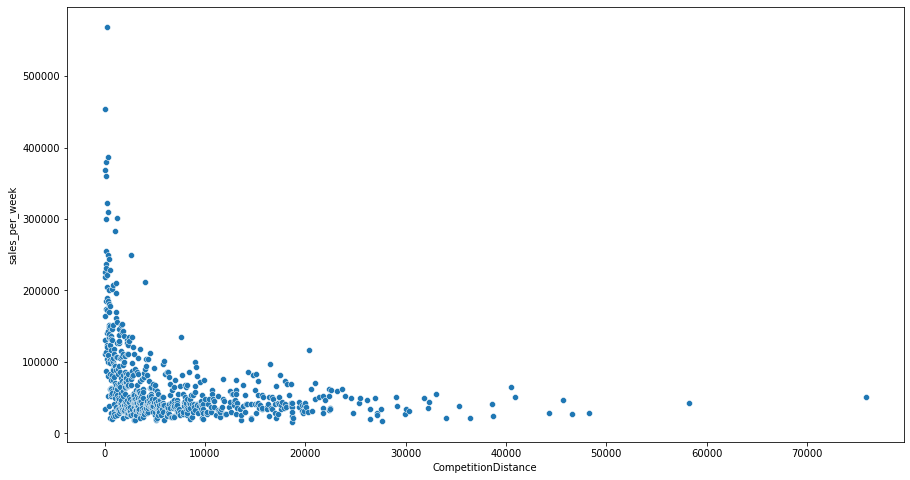

In [127]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(15,8))

sns.scatterplot(x ='CompetitionDistance', y='sales_per_week', ci=None, legend=True, palette=['darkblue'],
             data=sales_by_distance)

As seen here , more close arew the competitors more are the sales per week.

In [128]:
sales_by_distance

,CompetitionDistance,sales_per_week
0,20.0,34177
1,30.0,130990
2,40.0,218370
3,50.0,453998
4,60.0,164838
...,...,...
649,45740.0,46725
650,46590.0,26529
651,48330.0,28348
652,58260.0,42678


<Figure size 1080x576 with 0 Axes>

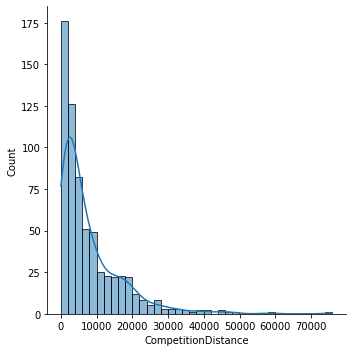

In [129]:
plt.figure(figsize=(15,8))

sns.displot(sales_by_distance, x="CompetitionDistance", kde=True)

Proving the same if we plot the distribution graoph we can easily see the peaks and density of sotres distance concentrated over the dataset

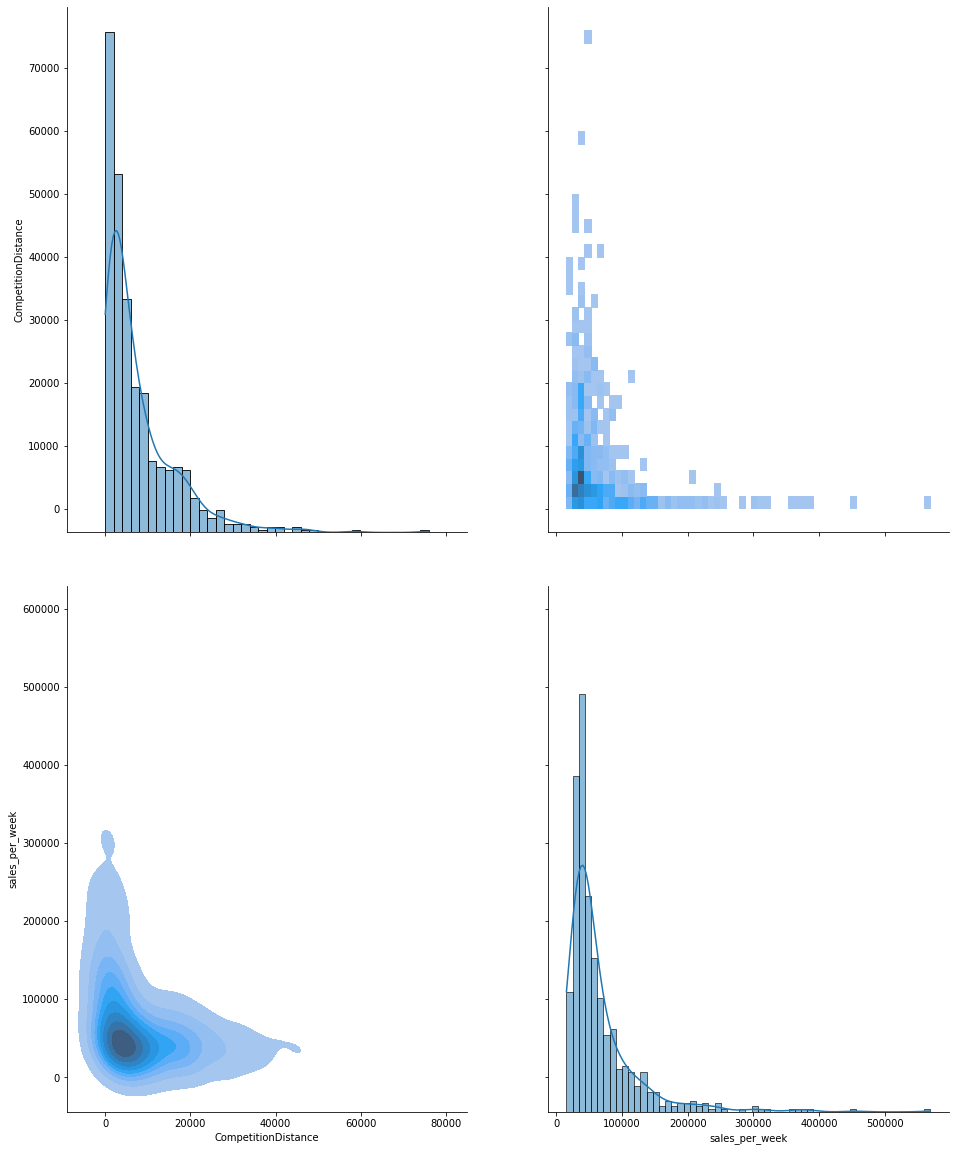

In [130]:
g = sns.PairGrid(sales_by_distance)
g.fig.set_size_inches(15,18)
g.map_upper(sns.histplot)
g.map_lower(sns.kdeplot, fill=True)
g.map_diag(sns.histplot, kde=True)

These graph throw an intresting light especially the left bottom one as it shows the concentration of the value that is contributing to the peak shown in the roght most corner. 

We can easily say that the dataset has lot of data of the stroes whose competitors in close by range

## **Section 5: Pearson Correlation of Features (Q5)**

In [48]:
merged_train_df.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval', 'Year', 'Month', 'Day',
       'WeekOfYear', 'AvgItemsBought', 'IsHoliday'],
      dtype='object')

In [49]:
cols = [  'DayOfWeek',
          'Sales', 
          'Customers',
          'Promo',
          'Open']

In [50]:
merged_train_df[cols].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 5 columns):
 #   Column     Non-Null Count    Dtype   
---  ------     --------------    -----   
 0   DayOfWeek  1017209 non-null  category
 1   Sales      1017209 non-null  uint32  
 2   Customers  1017209 non-null  uint16  
 3   Promo      1017209 non-null  uint8   
 4   Open       1017209 non-null  uint8   
dtypes: category(1), uint16(1), uint32(1), uint8(2)
memory usage: 8.7 MB


In [52]:
 merged_train_df[cols]
 

,DayOfWeek,Sales,Customers,Promo,Open
0,5,5263,555,1,1
1,4,5020,546,1,1
2,3,4782,523,1,1
3,2,5011,560,1,1
4,1,6102,612,1,1
...,...,...,...,...,...
1017204,6,4771,339,0,1
1017205,5,4540,326,0,1
1017206,4,4297,300,0,1
1017207,3,3697,305,0,1


In [53]:
merged_train_df[merged_train_df.CompetitionDistance.isna()]['Store'].unique()

array([291, 622, 879], dtype=uint64)

In [77]:
merged_train_df[(merged_train_df.Store == 291)| (merged_train_df.Store == 879) ].StoreType.unique()

['d']
Categories (1, object): ['d']

In [78]:
merged_train_df[(merged_train_df.Store == 622)].StoreType.unique()

['a']
Categories (1, object): ['a']

In [69]:
merged_train_df[merged_train_df['StoreType'] == 'a'].CompetitionDistance.max()

75860.0

In [71]:
merged_train_df[merged_train_df['StoreType'] == 'd'].CompetitionDistance.max()

48330.0

In [54]:
merged_train_df.loc[merged_train_df.Store == 622, 'CompetitionDistance'] = merged_train_df[merged_train_df['StoreType'] == 'd'].CompetitionDistance.max()

In [55]:
merged_train_df.loc[(merged_train_df.Store == 291) | (merged_train_df.Store == 879)  , 'CompetitionDistance'] = merged_train_df[merged_train_df['StoreType'] == 'a'].CompetitionDistance.max()

In [56]:
merged_train_df[merged_train_df.Store == 622].CompetitionDistance.unique()

array([48330.], dtype=float32)

In [57]:
merged_train_df[merged_train_df.Store == 879].CompetitionDistance.unique()

array([75860.], dtype=float32)

In [28]:
len(merged_train_df.Store.unique())

1115

In [58]:
null_percentage = (merged_train_df.isnull().sum() / merged_train_df.shape[0])/100

print(type(null_percentage))

new_df= pd.DataFrame(data=null_percentage,columns=['%nullvalues'])

new_df = new_df.sort_values(by='%nullvalues',ascending=False)

new_df

<class 'pandas.core.series.Series'>


,%nullvalues
PromoInterval,0.004994
Promo2SinceYear,0.004994
Promo2SinceWeek,0.004994
CompetitionOpenSinceMonth,0.003179
CompetitionOpenSinceYear,0.003179
AvgItemsBought,0.001699
DayOfWeek,0.000000
WeekOfYear,0.000000
Day,0.000000
Month,0.000000


**Pearson**

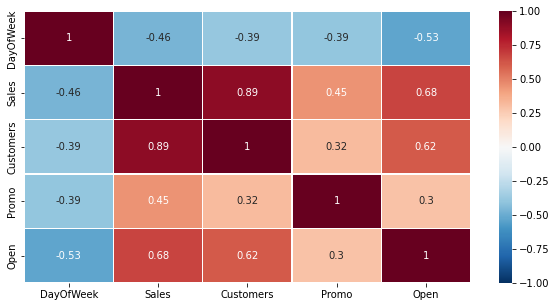

In [61]:
corr_pearson = merged_train_df[cols].corr(method='pearson')
plt.figure(figsize=(10,5))
sns.heatmap(corr_pearson,vmin=-1, vmax=1, cmap='RdBu_r', linewidths=0.2, annot=True)
plt.show()

**Spearman**

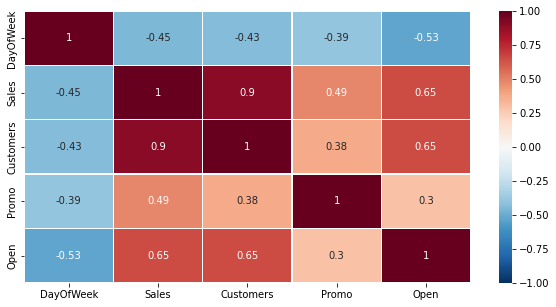

In [62]:
corr_spearman = merged_train_df[cols].corr(method='spearman')
plt.figure(figsize=(10,5))
sns.heatmap(corr_spearman,vmin=-1, vmax=1, cmap='RdBu_r', linewidths=0.2, annot=True)
plt.show()

***Outcome:***

Both the correlations have similar values but they do differ by small because Pearson correlation coefficients measure the linear relationship between the variables while Spearman correlation coefficients measure only monotonic relationships, relationship in which the variables tend to move in the same/opposite direction but not necessarily at a constant rate whereas the rate is constant in a linear relationship. Just as can be seen in the case of Promo and other columns

## **Section 6: Permutation Testing (Q6)**

The p-value represents the fraction of randomized data sets where the estimator performed as well or better than in the original data. A small p-value suggests that there is a real dependency between features and targets which has been used by the estimator to give good predictions. A large p-value may be due to lack of real dependency between features and targets or the estimator was not able to use the dependency to give good predictions

A small p-value (typically ≤ 0.05) indicates strong evidence against the null hypothesis, so you reject the null hypothesis.

A large p-value (> 0.05) indicates weak evidence against the null hypothesis, so you fail to reject the null hypothesis.

p-values very close to the cutoff (0.05) are considered to be marginal (could go either way). Always report the p-value so your readers can draw their own conclusions.



In [68]:
permutaion_test_df = merged_train_df[merged_train_df.Sales>0]
permutaion_test_df.describe()

,Store,Sales,Customers,Open,Promo,SchoolHoliday,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,844338.000000,844338.000000,844338.000000,844338.0,844338.000000,844338.000000,842152.000000,575738.0,575738.0,844338.000000,421046.0,421046.0
mean,558.421374,6955.959134,762.777166,1.0,0.446356,0.193578,5459.787109,NaN,NaN,0.498670,NaN,NaN
std,321.730861,3103.815515,401.194153,0.0,0.497114,0.395102,7808.335449,0.0,NaN,0.499999,0.0,NaN
min,1.000000,46.000000,8.000000,1.0,0.000000,0.000000,20.000000,1.0,1900.0,0.000000,1.0,2009.0
25%,280.000000,4859.000000,519.000000,1.0,0.000000,0.000000,710.000000,4.0,2006.0,0.000000,13.0,2011.0
50%,558.000000,6369.000000,676.000000,1.0,0.000000,0.000000,2320.000000,8.0,2010.0,0.000000,22.0,2012.0
75%,837.000000,8360.000000,893.000000,1.0,1.000000,0.000000,6890.000000,10.0,2013.0,1.000000,37.0,2013.0
max,1115.000000,41551.000000,7388.000000,1.0,1.000000,1.000000,75860.000000,12.0,2015.0,1.000000,50.0,2015.0


In [84]:
#GOOD EXAMPLE

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import permutation_test_score, StratifiedKFold


X = permutaion_test_df.Customers.values.reshape(-1, 1)
y = permutaion_test_df.Sales.apply(lambda x : np.log(x) if x>0 else 0) 

linear_regression = LinearRegression()

score_one, perm_scores_one, pvalue_one = permutation_test_score(
    linear_regression, X, y, scoring="neg_root_mean_squared_error", n_permutations=100
)

print(score_one, perm_scores_one, pvalue_one)

-0.2792260194402838 [-0.42527765 -0.42527908 -0.42527733 -0.42527892 -0.42527885 -0.42527712
 -0.4252794  -0.42527868 -0.42527846 -0.42527851 -0.42527867 -0.42527863
 -0.42527772 -0.42527781 -0.42527771 -0.4252787  -0.42527835 -0.4252777
 -0.42527844 -0.4252791  -0.42527728 -0.42527831 -0.42527748 -0.42527933
 -0.4252794  -0.42527761 -0.42527799 -0.42528021 -0.4252772  -0.42527872
 -0.4252786  -0.42527846 -0.42527878 -0.42527816 -0.42527898 -0.42527859
 -0.42527907 -0.4252785  -0.42527833 -0.42527868 -0.42527822 -0.42527897
 -0.42527913 -0.42527791 -0.42527779 -0.42527753 -0.4252791  -0.42527728
 -0.42527902 -0.42527754 -0.42527902 -0.42527821 -0.42527885 -0.42527889
 -0.42527819 -0.42527842 -0.42527746 -0.42527787 -0.42527876 -0.42527838
 -0.42527957 -0.42527845 -0.425277   -0.42527817 -0.42527738 -0.42527748
 -0.42527828 -0.4252775  -0.4252771  -0.42527704 -0.42527895 -0.42527863
 -0.42527809 -0.42527954 -0.42528013 -0.42527844 -0.42527895 -0.42527793
 -0.42527669 -0.42527893 -0.4252

Here we are getting the best possible p value , proving Customer is a good features for the model to be fitted upon and used as a classifier



In [85]:
perm_score_one_to_be_scaled  = np.append(perm_scores_one, score_one)

In [86]:
from sklearn.preprocessing import MinMaxScaler

perm_scores_one = perm_scores_one.reshape(-1,1)
min_max_scaler = MinMaxScaler()

fitted_scaler = min_max_scaler.fit(perm_scores_one)
fitted_perm_scores_one = fitted_scaler.transform(perm_scores_one)

In [87]:
score_one = float(fitted_perm_scores_one[-1])

In [88]:
fitted_perm_scores_one = np.delete(fitted_perm_scores_one, -1)

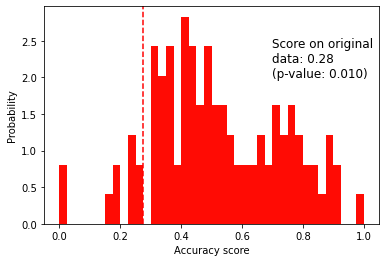

In [286]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

ax.hist(fitted_perm_scores_one, bins=40, density=True)
ax.axvline(score_one, ls="--", color="r")
score_label = f"Score on original\ndata: {score_one:.2f}\n(p-value: {pvalue_one:.3f})"
ax.text(0.7, 2, score_label, fontsize=12)
ax.set_xlabel("Accuracy score")
_ = ax.set_ylabel("Probability")

In [287]:
merged_train_df['Promo2SinceYear'] = merged_train_df['Promo2SinceYear'].replace(np.nan, 8.0)


In [290]:
# Unrelated One

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import permutation_test_score, StratifiedKFold

labels = permutaion_test_df['Promo2SinceYear'].astype('category').cat.categories.tolist()
replace_map = {'Promo2SinceYear' : {k: v for k,v in zip(labels,list(range(1,len(labels)+1)))}}
permutaion_test_df.replace(replace_map, inplace=True)

merged_train_promo_df = permutaion_test_df[['Promo2SinceYear','Sales']].copy(deep=True)
merged_train_promo_df.dropna(inplace=True)

X = merged_train_promo_df.Promo2SinceYear.values.reshape(-1, 1)
y = merged_train_promo_df.Sales.apply(lambda x : np.log(x) if x>0 else 0) 

linear_regression = LinearRegression()
model = linear_regression.fit(X, y)
score_two, perm_scores_two, pvalue_two = permutation_test_score(
    model, X, y, scoring="neg_root_mean_squared_error", n_permutations=100
)


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1743: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


In [291]:
perm_score_scaled_two  = np.append(perm_scores_two, score_two)


print(score_two, perm_scores_two, pvalue_two)

-0.4053298732064306 [-0.40545692 -0.40545725 -0.40545601 -0.40545581 -0.40547365 -0.40545645
 -0.40545666 -0.40545833 -0.40545568 -0.40545704 -0.4054557  -0.40545685
 -0.40545436 -0.40546009 -0.40545706 -0.40545617 -0.40545572 -0.40545547
 -0.40545829 -0.40545534 -0.40545804 -0.40545635 -0.4054565  -0.40545641
 -0.40545667 -0.40545639 -0.40545925 -0.40545617 -0.40545692 -0.40545735
 -0.40545807 -0.40545876 -0.40545693 -0.40545709 -0.40545734 -0.40545969
 -0.40545732 -0.40545818 -0.4054587  -0.40545718 -0.40545849 -0.40545627
 -0.40545624 -0.40545665 -0.40545757 -0.40545964 -0.40545471 -0.40546005
 -0.40545904 -0.4054563  -0.4054573  -0.40545625 -0.40545609 -0.40545955
 -0.40545586 -0.40545734 -0.40545882 -0.40545882 -0.40545698 -0.40545684
 -0.40545501 -0.40545895 -0.40545583 -0.40545731 -0.40545625 -0.40545588
 -0.40545588 -0.40545819 -0.40545599 -0.4054561  -0.40545937 -0.40545473
 -0.4054582  -0.40545854 -0.4054576  -0.40545657 -0.4054567  -0.40545815
 -0.40545946 -0.40545762 -0.405

Here too we are getting the best possible score for the given feature, hence proving that this too is a useful feature to be taken into consideration for model traning

In [96]:
perm_score_scaled_two.max()

-0.4053298732064306

In [97]:
from sklearn.preprocessing import MinMaxScaler

perm_score_scaled_two = perm_score_scaled_two.reshape(-1,1)
min_max_scaler = MinMaxScaler()

fitted_scaler = min_max_scaler.fit(perm_score_scaled_two)
fitted_perm_scores_two = fitted_scaler.transform(perm_score_scaled_two)


In [98]:
score_two = float(fitted_perm_scores_two[-1])

In [99]:
fitted_perm_scores_two = np.delete(fitted_perm_scores_two, -1)

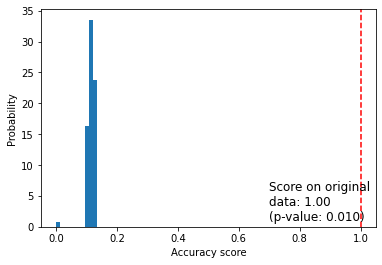

In [101]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.hist(fitted_perm_scores_two, bins=10, density=True)
ax.axvline(score_two, ls="--", color="r")
score_label = f"Score on original\ndata: {score_two:.2f}\n(p-value: {pvalue_two:.3f})"
ax.text(0.7, 1, score_label, fontsize=12)
ax.set_xlabel("Accuracy score")
_ = ax.set_ylabel("Probability")

In [102]:
#Random feature
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import permutation_test_score

labels = merged_train_df['Assortment'].astype('category').cat.categories.tolist()
replace_map = {'Assortment' : {k: v for k,v in zip(labels,list(range(1,len(labels)+1)))}}
merged_train_df.replace(replace_map, inplace=True)

merged_train_assortment_df = merged_train_df[['Assortment','Sales']].copy(deep=True)
merged_train_assortment_df.dropna(inplace=True)

X = merged_train_assortment_df.Assortment.values.reshape(-1, 1)

y = merged_train_assortment_df.Sales

linear_regression = LinearRegression()

score_three, perm_scores_three, pvalue_three = permutation_test_score(
    linear_regression, X, y, scoring="neg_mean_squared_log_error", n_permutations=100
)

print(score_three, perm_scores_three, pvalue_three)

-12.901239080735388 [-12.90673922 -12.90673771 -12.90676354 -12.90674255 -12.90675477
 -12.90675978 -12.90674218 -12.90674878 -12.90676202 -12.9067745
 -12.90672379 -12.90679395 -12.90669707 -12.90678647 -12.90673848
 -12.90677783 -12.90672014 -12.90670721 -12.90677644 -12.90670646
 -12.90676864 -12.9067707  -12.90679775 -12.90675967 -12.90674029
 -12.90675894 -12.90672225 -12.90674444 -12.90677212 -12.90673396
 -12.90675206 -12.9067499  -12.90682307 -12.9067513  -12.90675922
 -12.90672576 -12.9067582  -12.90677015 -12.90677758 -12.90674418
 -12.90673941 -12.90674939 -12.90671755 -12.90674996 -12.90671465
 -12.90676831 -12.90679819 -12.90673541 -12.90673893 -12.90675058
 -12.90675276 -12.90674677 -12.90678541 -12.90677603 -12.90676967
 -12.90669193 -12.90675389 -12.90678003 -12.90674895 -12.9067393
 -12.90673085 -12.90671837 -12.90675797 -12.90676401 -12.9067125
 -12.90681015 -12.90678059 -12.9067085  -12.90673946 -12.90669236
 -12.9067519  -12.90671057 -12.9067114  -12.90682111 -12.90

Here too we are getting the best possible score for the given feature, hence proving that this too is a useful feature to be taken into consideration for model traning

In [104]:
from sklearn.preprocessing import MinMaxScaler

perm_score_scaled_three = perm_scores_three.reshape(-1,1)
min_max_scaler = MinMaxScaler()

fitted_scaler = min_max_scaler.fit(perm_score_scaled_three)
fitted_perm_scores_three = fitted_scaler.transform(perm_score_scaled_three)

In [105]:
score_three = float(fitted_perm_scores_three[-1])

In [106]:
fitted_perm_scores_three = np.delete(fitted_perm_scores_three, -1)

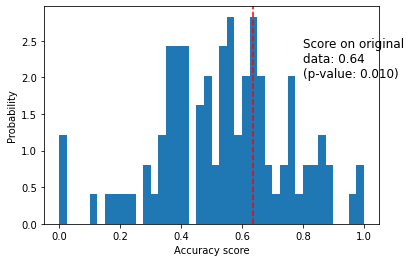

In [111]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

ax.hist(fitted_perm_scores_three, bins=40, density=True)
ax.axvline(score_three, ls="--", color="r")
score_label = f"Score on original\ndata: {score_three:.2f}\n(p-value: {pvalue_three:.3f})"
ax.text(0.8, 2, score_label, fontsize=12)
ax.set_xlabel("Accuracy score")
_ = ax.set_ylabel("Probability")

## **Section 7: Interesting findings (Q7)**

**Plot 1**

Visualizing the Revenue Share and Store types provided in the dataset



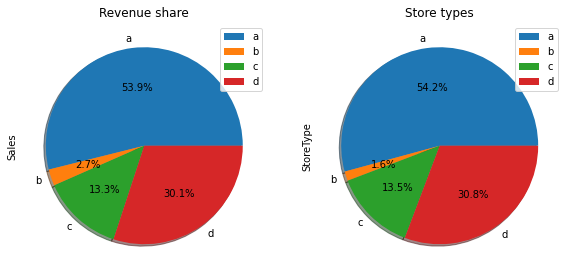

In [237]:
plt.figure(figsize=(15,8))
ax1 = plt.subplot(131)
merged_train_df.groupby('StoreType')['Sales'].sum().plot.pie(ax=ax1, title='Revenue share', legend=True, autopct='%1.1f%%', shadow=True)
ax2 = plt.subplot(132)
merged_train_df['StoreType'].value_counts().sort_index().plot.pie(rot=0, title='Store types', autopct='%1.1f%%', shadow=True, legend=True)

**Outcome**

The Sales geenated by the store type a are the maximum amongst its peers.

Though the proportion of store count to sales count is more in case of b as b type has 1.6% of stores still commands 2.7% in sales. So these are few but generate high revenue as proportion to other 3

Other 3 can be general purpose or small scale stores

**Plot 2**

Sale Trends over the days in the week

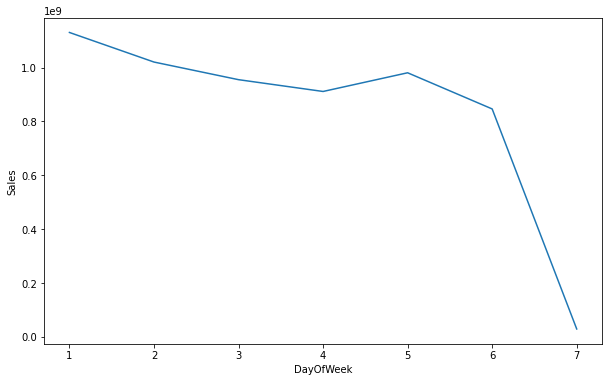

In [217]:
plt.figure(figsize=(10,6))
sales_by_days = merged_train_df.groupby('DayOfWeek')['Sales'].sum().reset_index()

sns.lineplot(x ='DayOfWeek', y='Sales', ci=None,
             data=sales_by_days)


**Outcome**

People generally prefer shopping over weekdays than on weekends. Probably chilling with friends and family over weekend as we can see sharp dip towards 6 and 7 day.

**Plot 3**

Graph to visualize when the competitors of the store came in existence

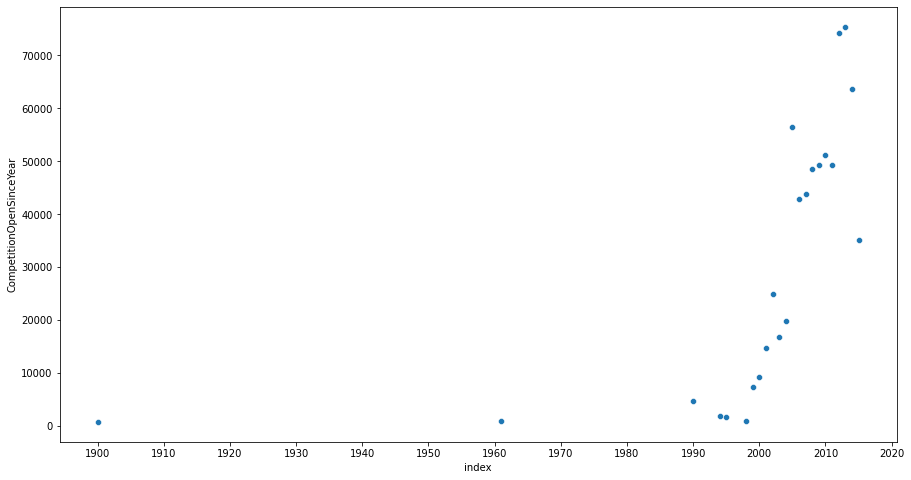

In [220]:
#CompetitionOpenSinceYear plot
plt.figure(figsize=(15,8))

merged_train_df_temp = merged_train_df.CompetitionOpenSinceYear.dropna()
sns.scatterplot(y ='CompetitionOpenSinceYear', x ='index', ci=None, legend=True, palette=['darkblue'], data=merged_train_df_temp.value_counts().reset_index())

plt.xticks([i for i in range(1900,2030,10)])
plt.show()

**Outcome**

As seen through the graph the most of the competitors were opened between years 2000 to 2010 and eventually wanning out in the recent datasets thats been provided.

**Plot 4**

When are the shops open?

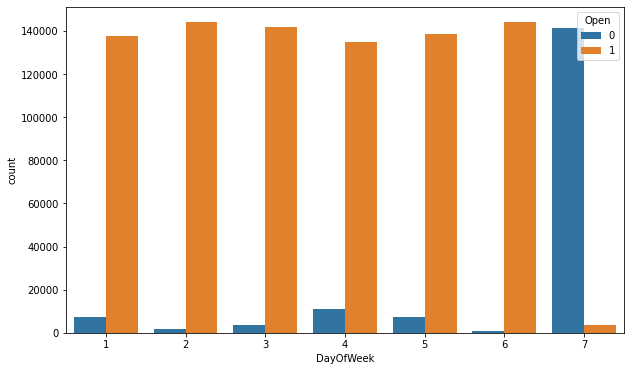

In [219]:
plt.figure(figsize=(10,6))

sns.countplot(x ='DayOfWeek', hue='Open',
             data=merged_train_df)

**Outcome:**

Looking at the visualized form, one can easily say that the stores are most open from Monday to Saturday and on Sunday eventually stay closed , maybe this might also be the cause of the sales in store dipping in around Sunday

**Plot 5**

StoreType vs Sales and Customers

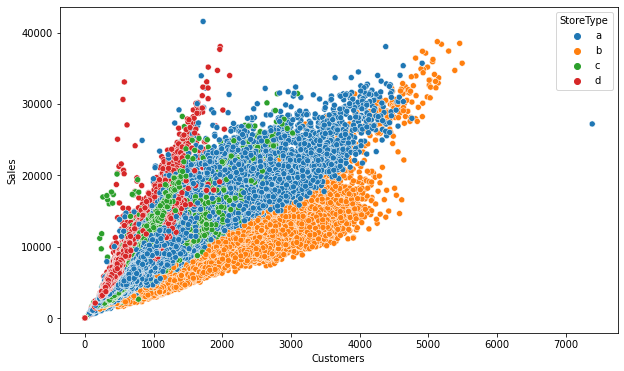

In [242]:
plt.figure(figsize=(10,6))

merged_train_df.StoreType.dropna(inplace= True)

sns.scatterplot(x ='Customers', y='Sales', hue='StoreType',
             data=merged_train_df)


**Outcome**

Sales in store type d is high even if there are less number of customers showing up and Sales in store type b remains near about constant even though there is a huge influx of customers visiting b store type which somewhat proves out first analysis that b might be a walmart like big departmental store

## **Section 8: Train Test Split and Modelling (Q8)**

In [18]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [19]:
# First mount your drive before running these cells. 
# Create a folder for the this HW and change to that dir
%cd /content/drive/MyDrive/DSF/HW3

/content/drive/MyDrive/DSF/HW3


In [365]:
import pandas as pd 
import numpy as np

train_dtypes = {
    'Store' : 'uint16',
    'DayOfWeek':'category',
    'Customers': 'uint16',
    'Sales': 'uint32',
    'Open' : 'uint8',
    'Promo': 'uint8',
    'SchoolHoliday': 'uint8',
    'StateHoliday': 'category'
}

store_dtypes = {
    'Store' : 'uint16',
    'StoreType':'category',
    'Assortment':'category',
    'CompetitionDistance': 'float32',
    'CompetitionOpenSinceMonth': 'float16',
    'CompetitionOpenSinceYear': 'float16', 
    'Promo2': 'uint8',
    'Promo2SinceWeek': 'float16',
    'Promo2SinceYear': 'float16',
    'PromoInterval': 'category',

}
parse_dates = ['Date']

train_df = pd.read_csv('/content/drive/MyDrive/DSF/HW3/train.csv', dtype=train_dtypes, parse_dates=parse_dates)

store_df = pd.read_csv('/content/drive/MyDrive/DSF/HW3/store.csv', dtype=store_dtypes)

store_df.head()





,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [366]:
#Merge Test and store

train_ = train_df.set_index('Store')
stores_ = store_df.set_index('Store')
merged_train_df = train_.merge(stores_, how='inner', left_index=True, right_index=True).reset_index()


In [367]:
features = ['Store',
            'Day',
            'Month',
            'Year',
            'DayOfWeek',
            'Sales', 
            'Promo',
            'Open',
            'StateHoliday',
            'SchoolHoliday',
            'CompetitionDistance',
            'StoreType',
            'Promo2',
            'PromoOpen',
            'CompetitionOpen',
            'StoreRank']

non_relevant_features = ['Year','Store']

In [368]:
merged_train_df['Year'] = merged_train_df.Date.dt.year
merged_train_df['Month'] = merged_train_df.Date.dt.month
merged_train_df['Day'] = merged_train_df.Date.dt.day
merged_train_df['WeekOfYear'] = merged_train_df.Date.dt.isocalendar().week

In [369]:
#Generating store rank
avg_sales = merged_train_df.groupby('Store')['Sales'].mean().reset_index(name = 'AvgSales')
merged_train_df = pd.merge(merged_train_df, avg_sales, on='Store')
# merged_train_df
merged_train_df['StoreRank'] = merged_train_df['AvgSales'].rank(method='dense')

In [370]:
merged_train_df.loc[merged_train_df.Store == 622, 'CompetitionDistance'] = merged_train_df[merged_train_df['StoreType'] == 'd'].CompetitionDistance.max()

In [371]:
merged_train_df.loc[(merged_train_df.Store == 291) | (merged_train_df.Store == 879)  , 'CompetitionDistance'] = merged_train_df[merged_train_df['StoreType'] == 'a'].CompetitionDistance.max()

In [372]:
# collapsing state holidays to 1 or 0

merged_train_df['StateHoliday'] = merged_train_df['StateHoliday'].replace({'0': 0, 'a': 1, 'b': 1, 'c': 1})

In [373]:
merged_train_df.Promo2SinceWeek.fillna(0, inplace=True)

In [374]:
merged_train_df.Promo2SinceYear.fillna(0, inplace=True)

In [375]:
#Converting competition open to months.
merged_train_df['CompetitionOpen'] = 12 * (merged_train_df['Year'] - merged_train_df['CompetitionOpenSinceYear']) + (merged_train_df['Month'] - merged_train_df['CompetitionOpenSinceMonth'])

#COnverting promo open to months.
merged_train_df['PromoOpen'] = 12 * (merged_train_df['Year'] - merged_train_df['Promo2SinceYear']) + (merged_train_df['WeekOfYear'] - merged_train_df['Promo2SinceWeek']) / 4.0


In [376]:
# Null analysis in df

null_percentage = (merged_train_df.isnull().sum() / merged_train_df.shape[0])/100

print(type(null_percentage))

new_df= pd.DataFrame(data=null_percentage,columns=['%nullvalues'])

new_df = new_df.sort_values(by='%nullvalues',ascending=False)

new_df

<class 'pandas.core.series.Series'>


,%nullvalues
PromoInterval,0.004994
CompetitionOpenSinceYear,0.003179
CompetitionOpen,0.003179
CompetitionOpenSinceMonth,0.003179
Promo2,0.000000
StoreRank,0.000000
AvgSales,0.000000
WeekOfYear,0.000000
Day,0.000000
Month,0.000000


In [377]:
selected_features_df = merged_train_df[features].copy(deep=True)


In [378]:
#one hot encoding for categorical data
categorical_features = ['DayOfWeek', 'StateHoliday', 'StoreType']
selected_features_df = pd.get_dummies(merged_train_df[features], columns = categorical_features)

In [379]:
selected_features_df = selected_features_df[selected_features_df.Sales !=0]

In [380]:
selected_features_df.CompetitionOpen.fillna(selected_features_df.CompetitionOpen.mean(), inplace=True)

In [381]:
null_percentage = (selected_features_df.isnull().sum() / selected_features_df.shape[0])/100

print(type(null_percentage))

new_df= pd.DataFrame(data=null_percentage,columns=['%nullvalues'])

new_df = new_df.sort_values(by='%nullvalues',ascending=False)

new_df

<class 'pandas.core.series.Series'>


,%nullvalues
Store,0.0
Day,0.0
StoreType_c,0.0
StoreType_b,0.0
StoreType_a,0.0
StateHoliday_1,0.0
StateHoliday_0,0.0
DayOfWeek_7,0.0
DayOfWeek_6,0.0
DayOfWeek_5,0.0


In [383]:
# Train test data split

train_data_df =  selected_features_df[~((selected_features_df.Year == 2015) & ((selected_features_df.Month == 5)|(selected_features_df.Month == 6)|(selected_features_df.Month == 7)))]
test_data_df = selected_features_df[~((selected_features_df.Year == 2015) & ((selected_features_df.Month == 5)|(selected_features_df.Month == 6)|(selected_features_df.Month == 7)))]

In [ ]:
train_data_df.info()

In [ ]:
test_data_df.info()

In [ ]:
# Droping non relevant columns 
train_data_df.drop(non_relevant_features, axis = 1, inplace=True)
test_data_df.drop(non_relevant_features, axis = 1, inplace=True)


In [386]:
train_data_df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 759848 entries, 92 to 1017207
Data columns (total 24 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Day                  759848 non-null  int64  
 1   Month                759848 non-null  int64  
 2   Sales                759848 non-null  uint32 
 3   Promo                759848 non-null  uint8  
 4   Open                 759848 non-null  uint8  
 5   SchoolHoliday        759848 non-null  uint8  
 6   CompetitionDistance  759848 non-null  float32
 7   Promo2               759848 non-null  uint8  
 8   PromoOpen            759848 non-null  float64
 9   CompetitionOpen      759848 non-null  float64
 10  StoreRank            759848 non-null  float64
 11  DayOfWeek_1          759848 non-null  uint8  
 12  DayOfWeek_2          759848 non-null  uint8  
 13  DayOfWeek_3          759848 non-null  uint8  
 14  DayOfWeek_4          759848 non-null  uint8  
 15  DayOfWeek_5    

In [ ]:
train_data_df.info()

In [387]:
selected_features_df.columns

Index(['Store', 'Day', 'Month', 'Year', 'Sales', 'Promo', 'Open',
       'SchoolHoliday', 'CompetitionDistance', 'Promo2', 'PromoOpen',
       'CompetitionOpen', 'StoreRank', 'DayOfWeek_1', 'DayOfWeek_2',
       'DayOfWeek_3', 'DayOfWeek_4', 'DayOfWeek_5', 'DayOfWeek_6',
       'DayOfWeek_7', 'StateHoliday_0', 'StateHoliday_1', 'StoreType_a',
       'StoreType_b', 'StoreType_c', 'StoreType_d'],
      dtype='object')

In [388]:
#Splitting training data into x and y
X_train, y_train = train_data_df.loc[:, train_data_df.columns != 'Sales'], train_data_df['Sales']

In [389]:
X_test, y_test = test_data_df.loc[:, test_data_df.columns != 'Sales'], test_data_df['Sales']

In [ ]:
%%timeit
# Generating model based on Random Forest
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

regressor = RandomForestRegressor(n_estimators=100, random_state=0)
regressor.fit(X_train, y_train)
y_pred_random = regressor.predict(X_test)


print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_random))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_random))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_random)))



Hyper Parameters: n_estimators=100, random_state=0

More the estimators more the model takes time to fit and train itself

In [ ]:
print('Root Mean Squared Percentage Error:',(np.sqrt(np.mean(np.square((y_test - y_pred_random) /(y_test))))))

In [428]:
%%timeit
# Generating model based on Random Forest
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

regressor_one = RandomForestRegressor(n_estimators=50, random_state=45)
regressor_one.fit(X_train, y_train)
y_pred_random_one = regressor.predict(X_test)


print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_random_one))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_random_one))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_random_one)))

Mean Absolute Error: 193.95860349701522
Mean Squared Error: 86226.57564335223
Root Mean Squared Error: 293.64362013051164


Hyper Parameters: n_estimators=50, random_state=45

decreaing estimators decreases the time taken to fit but makes in not optimal model.  random_state is the seed used by the random number generator; If RandomState instance, random_state is the random number generator; If None, the random number generator is the RandomState instance used by np.random. This has no or negligible effect on time

In [ ]:
print('Root Mean Squared Percentage Error:',(np.sqrt(np.mean(np.square((y_test - y_pred_random_one) /(y_test))))))

In [429]:
%%timeit
# Generating model based on Random Forest 
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

regressor_two = RandomForestRegressor(n_estimators=10, random_state=0)
regressor_two.fit(X_train, y_train)
y_pred_random_two = regressor.predict(X_test)


print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_random_two))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_random_two))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_random_two)))

Mean Absolute Error: 193.95860349701522
Mean Squared Error: 86226.57564335223
Root Mean Squared Error: 293.64362013051164
Mean Absolute Error: 193.95860349701522
Mean Squared Error: 86226.57564335223
Root Mean Squared Error: 293.64362013051164
Mean Absolute Error: 193.95860349701522
Mean Squared Error: 86226.57564335223
Root Mean Squared Error: 293.64362013051164
Mean Absolute Error: 193.95860349701522
Mean Squared Error: 86226.57564335223
Root Mean Squared Error: 293.64362013051164
Mean Absolute Error: 193.95860349701522
Mean Squared Error: 86226.57564335223
Root Mean Squared Error: 293.64362013051164
Mean Absolute Error: 193.95860349701522
Mean Squared Error: 86226.57564335223
Root Mean Squared Error: 293.64362013051164
1 loop, best of 5: 1min 25s per loop


Hyper Paramenters: n_estimators=10, random_state=0

decreasing estimators decreases the time to train the model but the case remains the same and is not a good classifier 

In [391]:
print('Root Mean Squared Percentage Error:',(np.sqrt(np.mean(np.square((y_test - y_pred_random_two) /(y_test))))))

Root Mean Squared Percentage Error: 0.07145778473114799


In [425]:
%%timeit

from sklearn.linear_model import LinearRegression
model_one = LinearRegression(n_jobs= 100, fit_intercept=True)
model_one.fit(X_train, y_train)
y_pred_linear = model_one.predict(X_test)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_linear))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_linear))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_linear)))


Mean Absolute Error: 1259.1025666251876
Mean Squared Error: 3422268.4329311554
Root Mean Squared Error: 1849.9374132470416
Mean Absolute Error: 1259.1025666251876
Mean Squared Error: 3422268.4329311554
Root Mean Squared Error: 1849.9374132470416
Mean Absolute Error: 1259.1025666251876
Mean Squared Error: 3422268.4329311554
Root Mean Squared Error: 1849.9374132470416
Mean Absolute Error: 1259.1025666251876
Mean Squared Error: 3422268.4329311554
Root Mean Squared Error: 1849.9374132470416
Mean Absolute Error: 1259.1025666251876
Mean Squared Error: 3422268.4329311554
Root Mean Squared Error: 1849.9374132470416
Mean Absolute Error: 1259.1025666251876
Mean Squared Error: 3422268.4329311554
Root Mean Squared Error: 1849.9374132470416
1 loop, best of 5: 819 ms per loop


In [426]:
print('Root Mean Squared Percentage Error:',(np.sqrt(np.mean(np.square((y_test - y_pred_linear) /( y_test))))))

Root Mean Squared Percentage Error: 0.3490320026381569


Hyper Parameters: n jobs: 100, fit_intercept =True.

Takes time to run and model but eventually more the jobs more better is the model

> Indented block



In [ ]:
%%timeit

from sklearn.linear_model import LinearRegression
model_one = LinearRegression(n_jobs= 50, fit_intercept=True)
model_one.fit(X_train, y_train)
y_pred_linear = model_one.predict(X_test)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_linear))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_linear))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_linear)))


In [ ]:
print('Root Mean Squared Percentage Error:',(np.sqrt(np.mean(np.square((y_test - y_pred_linear) /( y_test))))))

Hyper Parameters: n jobs: 50, fit_intercept =True.

Takes more time to run as the jobs are less  and model but eventually be not good as the above one


In [ ]:
%%timeit

from sklearn.linear_model import LinearRegression
model_one = LinearRegression(n_jobs=10, fit_intercept=False)
model_one.fit(X_train, y_train)
y_pred_linear = model_one.predict(X_test)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_linear))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_linear))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_linear)))


In [ ]:
print('Root Mean Squared Percentage Error:',(np.sqrt(np.mean(np.square((y_test - y_pred_linear) /( y_test))))))

Parameters: n_jobs=10, fit_intercept=False

Fit intercept causes the model to fit slow but that is taken care y the less number of jobs which eventually takes time to fit the regressor 

## **Section 9: t-test (Q9)**

A t-test is a type of inferential statistic used to determine if there is a significant difference between the means of two groups, which may be related in certain features.

In [427]:
import scipy.stats as stats

#perform two sample t-test with equal variances
stats.ttest_ind(a=y_pred_linear, b=y_pred_random, equal_var=True)

Ttest_indResult(statistic=-0.2443695456620683, pvalue=0.806944658923765)

T test statistic value determines how similar two models performed while evaluating on test data. More the statistic value more the similarity.

Here as we see the value is negative which means the models are not really doing the similar jobs 

## **Section 10: Screenshots (Q10)** 

In [395]:
import pandas as pd 
import numpy as np

test_dtypes = {
    'Store' : 'uint16',
    'DayOfWeek':'category',
    'Customers': 'uint16',
    'Sales': 'uint32',
    'Promo': 'uint8',
    'SchoolHoliday': 'uint8',
    'StateHoliday': 'category'
}


parse_dates = ['Date']

test_df = pd.read_csv('/content/drive/MyDrive/DSF/HW3/test.csv', dtype=test_dtypes, parse_dates=parse_dates)


In [396]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41088 entries, 0 to 41087
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Id             41088 non-null  int64         
 1   Store          41088 non-null  uint16        
 2   DayOfWeek      41088 non-null  category      
 3   Date           41088 non-null  datetime64[ns]
 4   Open           41077 non-null  float64       
 5   Promo          41088 non-null  uint8         
 6   StateHoliday   41088 non-null  category      
 7   SchoolHoliday  41088 non-null  uint8         
dtypes: category(2), datetime64[ns](1), float64(1), int64(1), uint16(1), uint8(2)
memory usage: 1.2 MB


In [397]:
test_df.head()

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1.0,1,0,0
1,2,3,4,2015-09-17,1.0,1,0,0
2,3,7,4,2015-09-17,1.0,1,0,0
3,4,8,4,2015-09-17,1.0,1,0,0
4,5,9,4,2015-09-17,1.0,1,0,0


In [398]:
null_percentage = (test_df.isnull().sum() / test_df.shape[0])/100

print(type(null_percentage))

new_df= pd.DataFrame(data=null_percentage,columns=['%nullvalues'])

new_df = new_df.sort_values(by='%nullvalues',ascending=False)

new_df

<class 'pandas.core.series.Series'>


,%nullvalues
Open,0.000003
Id,0.000000
Store,0.000000
DayOfWeek,0.000000
Date,0.000000
Promo,0.000000
StateHoliday,0.000000
SchoolHoliday,0.000000


In [399]:
test_df[test_df.Open.isna()]

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
479,480,622,4,2015-09-17,NaN,1,0,0
1335,1336,622,3,2015-09-16,NaN,1,0,0
2191,2192,622,2,2015-09-15,NaN,1,0,0
3047,3048,622,1,2015-09-14,NaN,1,0,0
4759,4760,622,6,2015-09-12,NaN,0,0,0
5615,5616,622,5,2015-09-11,NaN,0,0,0
6471,6472,622,4,2015-09-10,NaN,0,0,0
7327,7328,622,3,2015-09-09,NaN,0,0,0
8183,8184,622,2,2015-09-08,NaN,0,0,0
9039,9040,622,1,2015-09-07,NaN,0,0,0


In [239]:
test_df[test_df.Store == 622]

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
479,480,622,4,2015-09-17,NaN,1,0,0
1335,1336,622,3,2015-09-16,NaN,1,0,0
2191,2192,622,2,2015-09-15,NaN,1,0,0
3047,3048,622,1,2015-09-14,NaN,1,0,0
3903,3904,622,7,2015-09-13,0.0,0,0,0
4759,4760,622,6,2015-09-12,NaN,0,0,0
5615,5616,622,5,2015-09-11,NaN,0,0,0
6471,6472,622,4,2015-09-10,NaN,0,0,0
7327,7328,622,3,2015-09-09,NaN,0,0,0
8183,8184,622,2,2015-09-08,NaN,0,0,0


In [400]:
test_df.Open.fillna(1.0, inplace=True)

In [401]:
test_ = test_df.set_index('Store')
stores_ = store_df.set_index('Store')
merged_test_df = test_.merge(stores_, how='inner', left_index=True, right_index=True).reset_index()

In [402]:
merged_test_df['Year'] = merged_test_df.Date.dt.year
merged_test_df['Month'] = merged_test_df.Date.dt.month
merged_test_df['Day'] = merged_test_df.Date.dt.day
merged_test_df['WeekOfYear'] = merged_test_df.Date.dt.isocalendar().week

In [403]:
merged_test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41088 entries, 0 to 41087
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Store                      41088 non-null  uint64        
 1   Id                         41088 non-null  int64         
 2   DayOfWeek                  41088 non-null  category      
 3   Date                       41088 non-null  datetime64[ns]
 4   Open                       41088 non-null  float64       
 5   Promo                      41088 non-null  uint8         
 6   StateHoliday               41088 non-null  category      
 7   SchoolHoliday              41088 non-null  uint8         
 8   StoreType                  41088 non-null  category      
 9   Assortment                 41088 non-null  category      
 10  CompetitionDistance        40992 non-null  float32       
 11  CompetitionOpenSinceMonth  25872 non-null  float16       
 12  Comp

In [404]:
test_features = ['Store',
            'Day',
            'Month',
            'Year',
            'DayOfWeek',
            'Promo',
            'Open',
            'StateHoliday',
            'SchoolHoliday',
            'CompetitionDistance',
            'StoreType',
            'Promo2',
            'PromoOpen',
            'CompetitionOpen',
            'StoreRank']

non_relevant_test_features = ['Year', 'Store']

In [405]:
rank_dict = dict(zip(merged_train_df['Store'], merged_train_df['StoreRank']))

In [406]:
merged_test_df["StoreRank"] = merged_test_df["Store"].apply(lambda x: rank_dict.get(x))

In [407]:
merged_test_df.Promo2SinceWeek.fillna(0, inplace=True)

In [408]:
merged_test_df.Promo2SinceYear.fillna(0, inplace=True)

In [409]:
#Converting competition open to months.
merged_test_df['CompetitionOpen'] = 12 * (merged_test_df['Year'] - merged_test_df['CompetitionOpenSinceYear']) + (merged_test_df['Month'] - merged_test_df['CompetitionOpenSinceMonth'])

#COnverting promo open to months.
merged_test_df['PromoOpen'] = 12 * (merged_test_df['Year'] - merged_test_df['Promo2SinceYear']) + (merged_test_df['WeekOfYear'] - merged_test_df['Promo2SinceWeek']) / 4.0


In [410]:
merged_test_df.loc[merged_test_df.Store == 622, 'CompetitionDistance'] = merged_test_df[merged_test_df['StoreType'] == 'd'].CompetitionDistance.max()

In [411]:
merged_test_df.loc[(merged_test_df.Store == 291) | (merged_test_df.Store == 879)  , 'CompetitionDistance'] = merged_test_df[merged_test_df['StoreType'] == 'a'].CompetitionDistance.max()

In [412]:
categorical_test_features = ['DayOfWeek', 'StateHoliday', 'StoreType']
selected_test_features_df = pd.get_dummies(merged_test_df[test_features], columns = categorical_test_features)

In [413]:
selected_test_features_df.drop(non_relevant_test_features, axis = 1, inplace=True)

In [414]:
selected_test_features_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41088 entries, 0 to 41087
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Day                  41088 non-null  int64  
 1   Month                41088 non-null  int64  
 2   Promo                41088 non-null  uint8  
 3   Open                 41088 non-null  float64
 4   SchoolHoliday        41088 non-null  uint8  
 5   CompetitionDistance  41088 non-null  float32
 6   Promo2               41088 non-null  uint8  
 7   PromoOpen            41088 non-null  float64
 8   CompetitionOpen      25872 non-null  float64
 9   StoreRank            41088 non-null  float64
 10  DayOfWeek_1          41088 non-null  uint8  
 11  DayOfWeek_2          41088 non-null  uint8  
 12  DayOfWeek_3          41088 non-null  uint8  
 13  DayOfWeek_4          41088 non-null  uint8  
 14  DayOfWeek_5          41088 non-null  uint8  
 15  DayOfWeek_6          41088 non-null 

In [415]:
selected_test_features_df.CompetitionOpen.fillna(selected_test_features_df.CompetitionOpen.mean(), inplace=True)

In [416]:
null_percentage = (selected_test_features_df.isnull().sum() / selected_test_features_df.shape[0])/100

print(type(null_percentage))

new_df= pd.DataFrame(data=null_percentage,columns=['%nullvalues'])

new_df = new_df.sort_values(by='%nullvalues',ascending=False)

new_df

<class 'pandas.core.series.Series'>


,%nullvalues
Day,0.0
DayOfWeek_3,0.0
StoreType_c,0.0
StoreType_b,0.0
StoreType_a,0.0
StateHoliday_a,0.0
StateHoliday_0,0.0
DayOfWeek_7,0.0
DayOfWeek_6,0.0
DayOfWeek_5,0.0


In [421]:
# Output Linear Regression model predictions

final_predictions_linear = pd.DataFrame(model_one.predict(selected_test_features_df), columns=['Sales'])
final_predictions_linear['Id'] = test_df['Id']
final_predictions_linear.to_csv(path_or_buf='results_final_linear_regression.csv', index=False)

final_predictions_linear.head()

,Sales,Id
0,5454.569624,1
1,5414.747430,2
2,5770.333764,3
3,6848.747545,4
4,3586.730857,5


In [422]:
# Exporting the random forest regressor model output 
# Output Linear Regression model predictions

final_predictions_df_random_forest= pd.DataFrame(regressor.predict(selected_test_features_df), columns=['Sales'])
final_predictions_df_random_forest['Id'] = test_df['Id']
final_predictions_df_random_forest.to_csv(path_or_buf='results_final_random_forest.csv', index=False)

final_predictions_df_random_forest.head()

,Sales,Id
0,4288.59,1
1,4873.96,2
2,5713.10,3
3,5943.26,4
4,6735.18,5


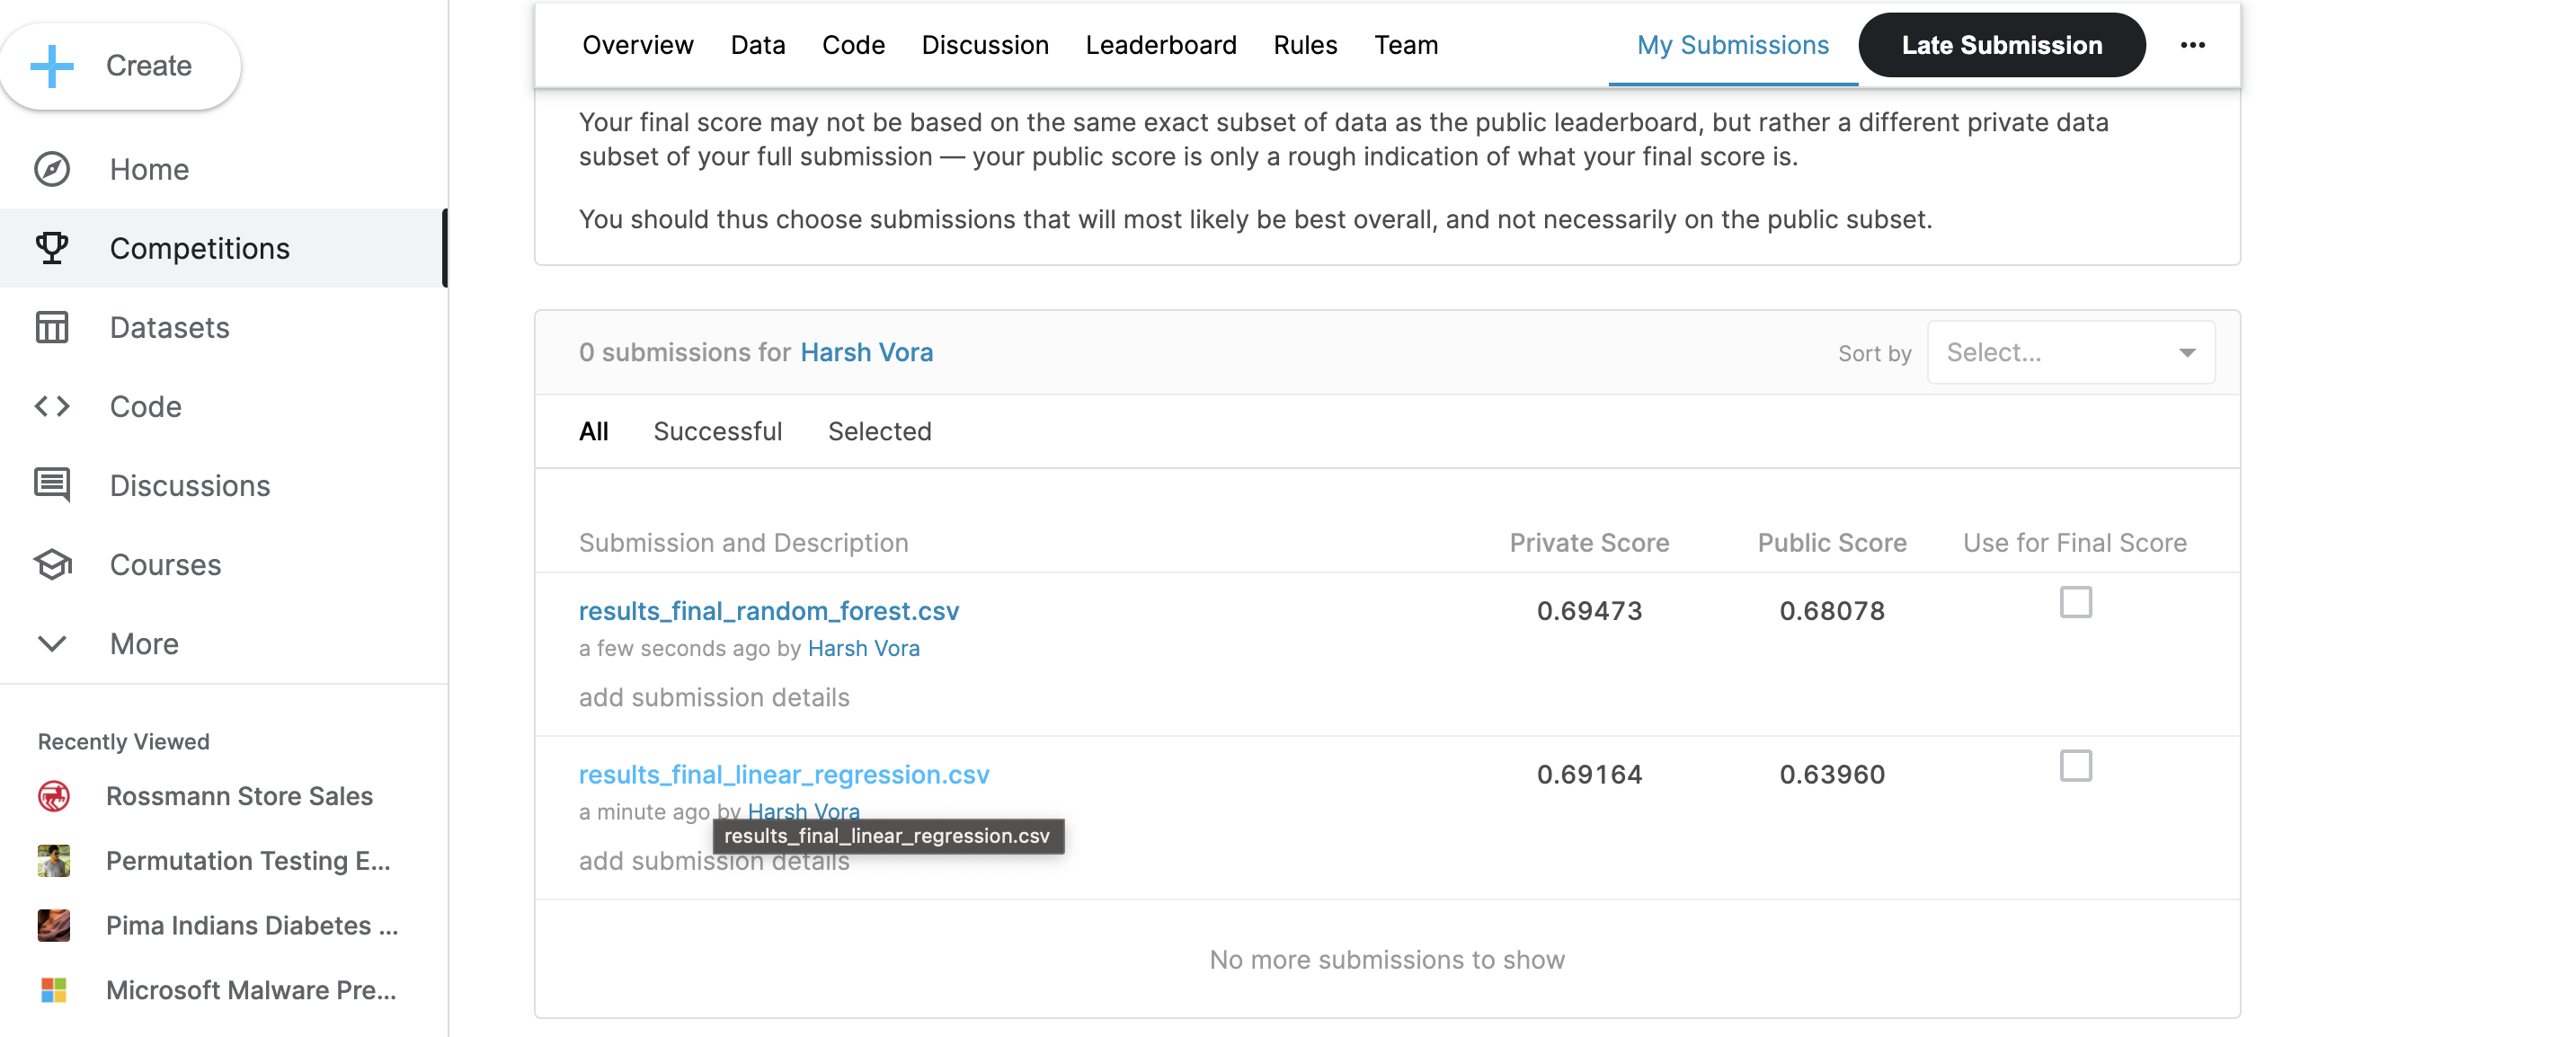

Public Score & Highest Rank: 0.69164

Private Score & Highest Rank: 0.69473

Kaggle profile link: https://www.kaggle.com/harvora
